#Jamboree Education : Linear Regression

1. Introduction

❓ What is Jamboree Business Case Study?

- Jamboree is a renowned educational institution that has successfully assisted numerous
students in gaining admission to top colleges abroad. With their proven
problem-solving methods, they have helped students achieve exceptional scores on
exams like GMAT, GRE, and SAT with minimal effort.

🎯 Objective:

- To further support students, Jamboree has recently introduced a new feature on their
website. This feature enables students to assess their probability of admission to Ivy
League colleges, considering the unique perspective of Indian applicants.

- By conducting a thorough analysis, we can assist Jamboree in understanding the crucial
factors impacting graduate admissions and their interrelationships. Additionally, we can
provide predictive insights to determine an individual's admission chances based on
various variables.


📚 About Data:

📃 Features of the dataset:

● Serial No.: This column represents the unique row identifier for each applicant in the dataset.

● GRE Scores: This column contains the GRE (Graduate Record Examination) scores of
the applicants, which are measured on a scale of 0 to 340.

● TOEFL Scores: This column includes the TOEFL (Test of English as a Foreign Language)
scores of the applicants, which are measured on a scale of 0 to 120.

● University Rating: This column indicates the rating or reputation of the university that
the applicants are associated with.The rating is based on a scale of 0 to 5, with 5 representing the highest rating.

● SOP: This column represents the strength of the applicant's statement of purpose,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.

● LOR: This column represents the strength of the applicant's letter of recommendation,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.

● CGPA: This column contains the undergraduate Grade Point Average (GPA) of the
applicants, which is measured on a scale of 0 to 10.

● Research: This column indicates whether the applicant has research experience (1) or
not (0).

● Chance of Admit: This column represents the estimated probability or chance of
admission for each applicant, ranging from 0 to 1.

❓ What is expected?

● Assuming you’re a data scientist/ML engineer hired by Jamboree, your primary objective is to
analyze the given dataset and derive valuable insights from it. Additionally, utilize the dataset
to construct a predictive model capable of estimating an applicant's likelihood of admission
based on the available features.

#1. Define the problem statement.

🎯 Key Considerations for the Problem Statement:

✔ Data-driven insights—Leverage GRE, TOEFL, CGPA, SOP, LOR, University Rating, and Research experience to determine admission probability.

✔ Personalized prediction models—Build an AI-powered system to help students understand their chances based on their profile.

✔ Optimization of admission strategies—Enable Jamboree to refine consulting methods by identifying the most influential factors in acceptance decisions.

🚀 Additional Perspectives:

- Comparative analysis—Determine how Indian applicants differ from global trends in Ivy League admissions.

- Bias detection—Ensure transparency in prediction models to avoid biases in university ratings and recommendations.

- Feature engineering—Assess whether additional variables like extracurricular activities, internships, or publication records enhance the prediction accuracy.

- Real-time prediction updates—Design a dynamic model that adjusts probabilities based on trending admission factors from past acceptance rates.


#2. Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.

In [1]:
!wget "https://drive.google.com/uc?export=download&id=12jIp9fN9fy0wpir7S6CaptxrWUssdY33" -O Jamboree.csv

--2025-06-03 11:58:31--  https://drive.google.com/uc?export=download&id=12jIp9fN9fy0wpir7S6CaptxrWUssdY33
Resolving drive.google.com (drive.google.com)... 142.251.183.139, 142.251.183.102, 142.251.183.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.183.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=12jIp9fN9fy0wpir7S6CaptxrWUssdY33&export=download [following]
--2025-06-03 11:58:31--  https://drive.usercontent.google.com/download?id=12jIp9fN9fy0wpir7S6CaptxrWUssdY33&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.193.132, 2607:f8b0:4001:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.193.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [application/octet-stream]
Saving to: ‘Jamboree.csv’

Jamboree.csv        100%[===================>]  15.80K  --.-KB/

In [81]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# loading the dataset
Jamboree=pd.read_csv("Jamboree.csv")
#to view full data
Jamboree

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
#to view columns

Jamboree.columns
#df.keys()== df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
#view first 5 rows/records
Jamboree.head(5)
#view first 5 rows/records default=5
#df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
#view last 5 rows/records,deafault=5
Jamboree.tail()
#view last 5 rows/records
#df.tail(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [7]:
#To get index of dataframe
Jamboree.index

RangeIndex(start=0, stop=500, step=1)

In [8]:
# to get dimensional detail of dataframe

Jamboree.ndim

#2D

2

In [9]:
# to get complete information of each column of dataframe like counts,datatype,memory usage.
#Note: For missing value in each column data type will be object

Jamboree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### 🔍 Insights

From the above details it is clear that given dataframe is of dimension 2D with 500 rows and 9 columns.

Also we can also observe that there no missing values.


In [10]:
#Drop any irrelevant column present in the dataset.

# Drop irrelevant column
Jamboree.drop(columns=["Serial No."], inplace=True)

- Dropped unique row Identifier: Serial No

In [11]:
#Check the shape of the dataset provided.

#To get shape information

Jamboree.shape

(500, 8)

- The shape of the dataset is 500 rows and 9 columns

In [12]:
#Check the data type of each column.

Jamboree.dtypes

,0
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


#📌 Data Type Summary in Dataset

Dataset consists of two primary data types:

✔ Integer (int64): Used for GRE Score, TOEFL Score, University Rating, Research (binary variable).

✔ Float (float64): Used for SOP, LOR, CGPA, and Chance of Admit (continuous values).

In [13]:
#Comment on the range of attributes.

# Comments on the range of attributes
print("Comments on the range of attributes:")
for column in Jamboree.columns:
    print(f"{column}: {Jamboree[column].min()} to {Jamboree[column].max()}")

Comments on the range of attributes:
GRE Score: 290 to 340
TOEFL Score: 92 to 120
University Rating: 1 to 5
SOP: 1.0 to 5.0
LOR : 1.0 to 5.0
CGPA: 6.8 to 9.92
Research: 0 to 1
Chance of Admit : 0.34 to 0.97


#📌 Summary of Attribute Ranges

Dataset covers key academic and application factors influencing graduate admissions. Below are the observed ranges for each variable:

✔ GRE Score: 290 to 340 → Competitive range for graduate admissions.

✔ TOEFL Score: 92 to 120 → Strong English proficiency assessment.

✔ University Rating: 1 to 5 → Reputation scale based on academic ranking.

✔ SOP Strength: 1.0 to 5.0 → Measures the impact of the applicant’s statement of purpose.

✔ LOR Strength: 1.0 to 5.0 → Assesses recommendation quality.

✔ CGPA: 6.8 to 9.92 → Higher CGPA often correlates with better admission chances.

✔ Research Experience: 0 to 1 → Indicates whether the applicant has prior research exposure.

✔ Chance of Admission: 0.34 to 0.97 → Probability range for acceptance, based on overall application strength.

📝 Statistical Summary

In [14]:
#Display the statistical summary of the entire dataset.
Jamboree.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


📌 Summary of Dataset Insights

- Dataset provides detailed metrics on graduate admissions, offering insights into score distributions, academic profiles, and admission probabilities. Here’s a concise breakdown of key findings:

🔍 Key Observations

✔ GRE & TOEFL Scores:

- Average GRE Score: 316.47, ranging from 290 to 340.

- Average TOEFL Score: 107.19, ranging from 92 to 120.

- Standard deviations (GRE: 11.30, TOEFL: 6.08) indicate moderate variation in applicant performance.

✔ University Rating & SOP/LOR Strength:

- University ratings range from 1 to 5, with an average of 3.11, suggesting most applicants come from mid-tier institutions.

- SOP (3.37 avg.) & LOR (3.48 avg.) reflect moderately strong recommendations among candidates.

✔ CGPA & Research:

- CGPA ranges from 6.8 to 9.92, averaging 8.57—higher GPAs likely correlate with higher admission chances.

- 56% of applicants have research experience (Research avg: 0.56), implying prior research exposure boosts chances.

✔ Chance of Admission:

- Probability ranges from 0.34 to 0.97, with a mean of 0.72, indicating most applicants have a fair chance of acceptance.

- High standard deviation (0.14) suggests notable variation in admission probabilities.

In [15]:
#Changing datatypes

# Convert selected numerical features into categorical
Jamboree["University Rating"] = Jamboree["University Rating"].astype("category")
Jamboree["Research"] = Jamboree["Research"].astype("category")

In [16]:
Jamboree.dtypes

,0
GRE Score,int64
TOEFL Score,int64
University Rating,category
SOP,float64
LOR,float64
CGPA,float64
Research,category
Chance of Admit,float64


In [17]:
#Display the statistical summary of the entire dataset.
Jamboree.describe(include="all")

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.0,500.000000,500.00000,500.000000,500.0,500.00000
unique,NaN,NaN,5.0,NaN,NaN,NaN,2.0,NaN
top,NaN,NaN,3.0,NaN,NaN,NaN,1.0,NaN
freq,NaN,NaN,162.0,NaN,NaN,NaN,280.0,NaN
mean,316.472000,107.192000,NaN,3.374000,3.48400,8.576440,NaN,0.72174
std,11.295148,6.081868,NaN,0.991004,0.92545,0.604813,NaN,0.14114
min,290.000000,92.000000,NaN,1.000000,1.00000,6.800000,NaN,0.34000
25%,308.000000,103.000000,NaN,2.500000,3.00000,8.127500,NaN,0.63000
50%,317.000000,107.000000,NaN,3.500000,3.50000,8.560000,NaN,0.72000
75%,325.000000,112.000000,NaN,4.000000,4.00000,9.040000,NaN,0.82000


📌 Insights on Categorical Columns:

Dataset includes several categorical variables that play a crucial role in graduate admissions prediction. Here’s a breakdown of key insights:

✔ University Rating:

- 5 unique categories (1 to 5)—representing the university's reputation.

- Most common rating: 3 (162 applicants)—suggesting mid-tier university applicants dominate.

✔ Research Experience:

- Binary (0 or 1)—indicating whether an applicant has prior research experience.

- Majority (280 applicants) have research experience—suggesting research exposure significantly impacts admissions.

📍 For Non-graphical Analysis:

✅ Sanity Check for columns

In [18]:
# checking the unique values for columns
for i in Jamboree.columns:
  print('Unique Values in',i,'column are :-')
  print(Jamboree[i].unique())
  print('-'*70)


Unique Values in GRE Score column are :-
[337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]
----------------------------------------------------------------------
Unique Values in TOEFL Score column are :-
[118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]
----------------------------------------------------------------------
Unique Values in University Rating column are :-
[4, 3, 2, 5, 1]
Categories (5, int64): [1, 2, 3, 4, 5]
----------------------------------------------------------------------
Unique Values in SOP column are :-
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
----------------------------------------------------------------------
Unique Values in LOR  column are :-
[4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
--------------------------------------------------------------

In [19]:
# checking the unique values for columns
for i in Jamboree.columns:
  print('Unique Values in',i,'column are :-')
  print(Jamboree[i].nunique())
  print('-'*70)


Unique Values in GRE Score column are :-
49
----------------------------------------------------------------------
Unique Values in TOEFL Score column are :-
29
----------------------------------------------------------------------
Unique Values in University Rating column are :-
5
----------------------------------------------------------------------
Unique Values in SOP column are :-
9
----------------------------------------------------------------------
Unique Values in LOR  column are :-
9
----------------------------------------------------------------------
Unique Values in CGPA column are :-
184
----------------------------------------------------------------------
Unique Values in Research column are :-
2
----------------------------------------------------------------------
Unique Values in Chance of Admit  column are :-
61
----------------------------------------------------------------------


In [20]:
for i in Jamboree.columns:
  print('Value count in',i,'column are :-')
  print(Jamboree[i].value_counts())
  print('-'*70)

Value count in GRE Score column are :-
GRE Score
312    24
324    23
316    18
322    17
327    17
321    17
311    16
320    16
314    16
325    15
317    15
308    13
323    13
315    13
300    12
319    12
313    12
326    12
304    12
318    12
305    11
310    11
301    11
307    10
329    10
299    10
298    10
331     9
328     9
309     9
340     9
330     8
334     8
332     8
302     7
306     7
297     6
296     5
303     5
336     5
295     5
333     4
338     4
335     4
339     3
337     2
294     2
290     2
293     1
Name: count, dtype: int64
----------------------------------------------------------------------
Value count in TOEFL Score column are :-
TOEFL Score
110    44
105    37
104    29
106    28
107    28
112    28
103    25
100    24
102    24
99     23
111    20
101    20
108    19
109    19
113    19
114    18
116    16
115    11
118    10
119    10
98     10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: count, dtype: i

#3. Use Non-graphical and graphical analysis for getting insights about variables.

In [21]:
Jamboree.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

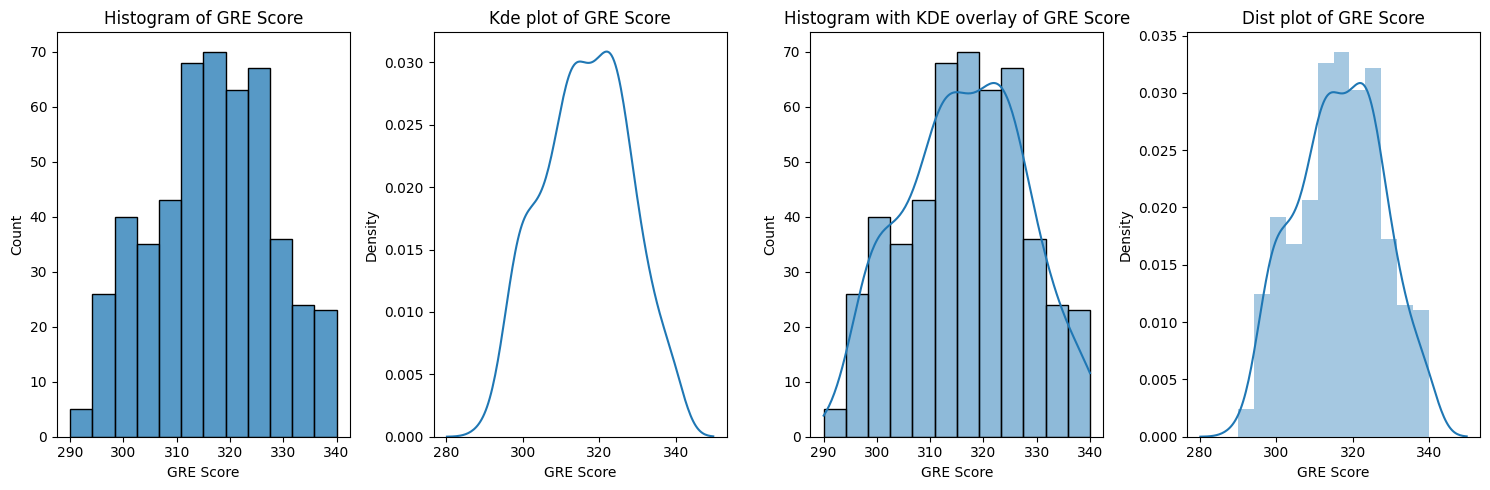

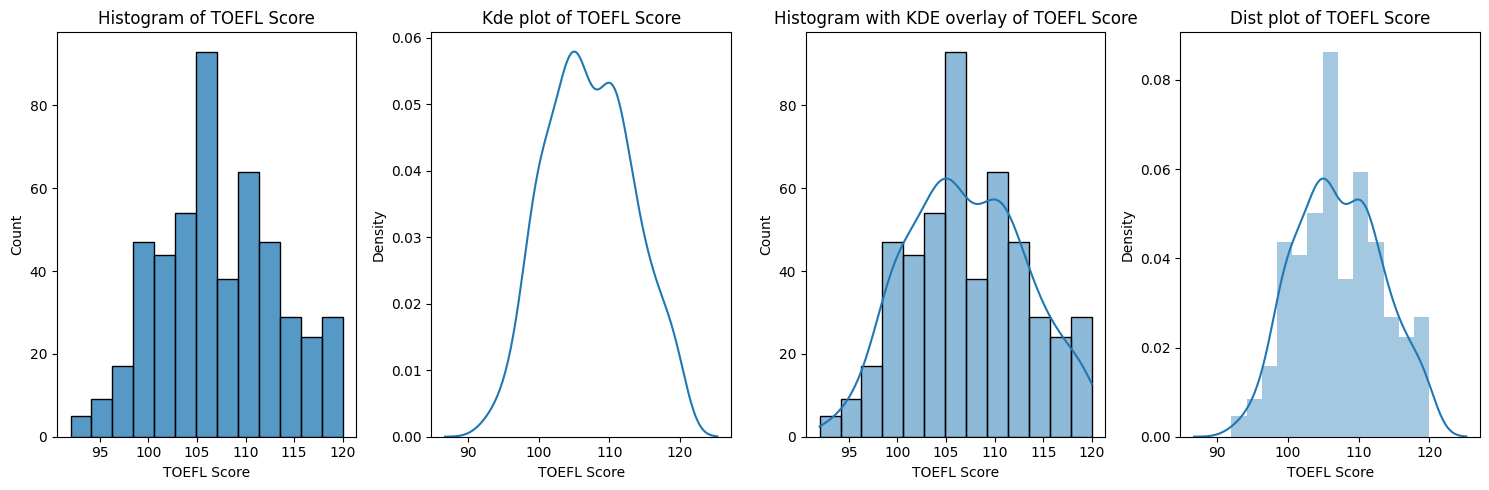

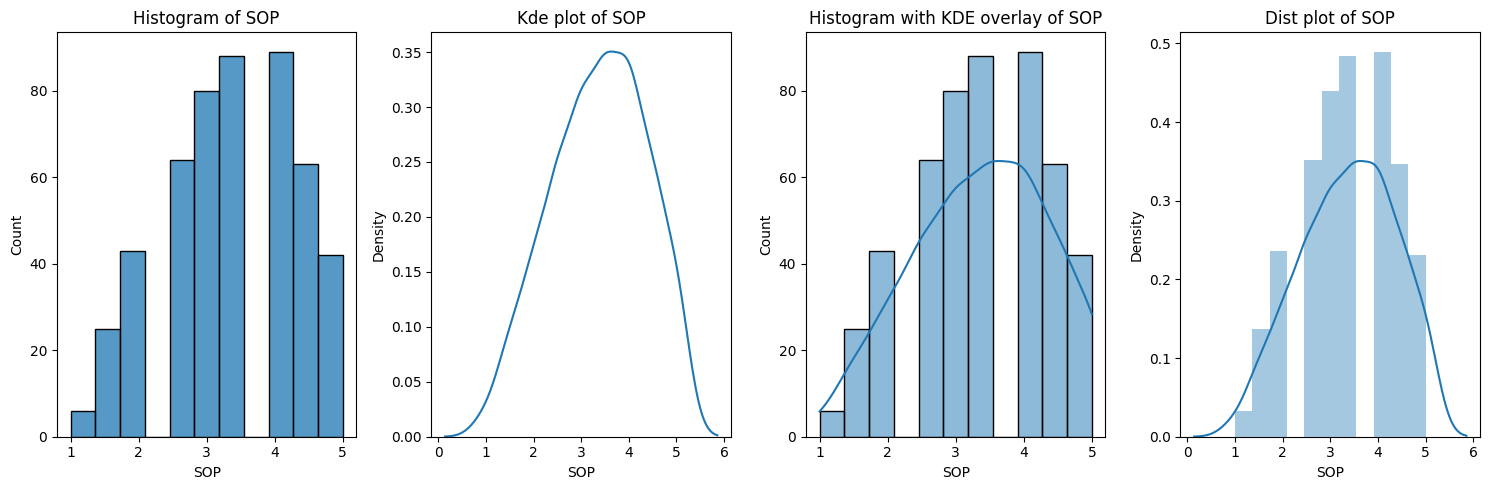

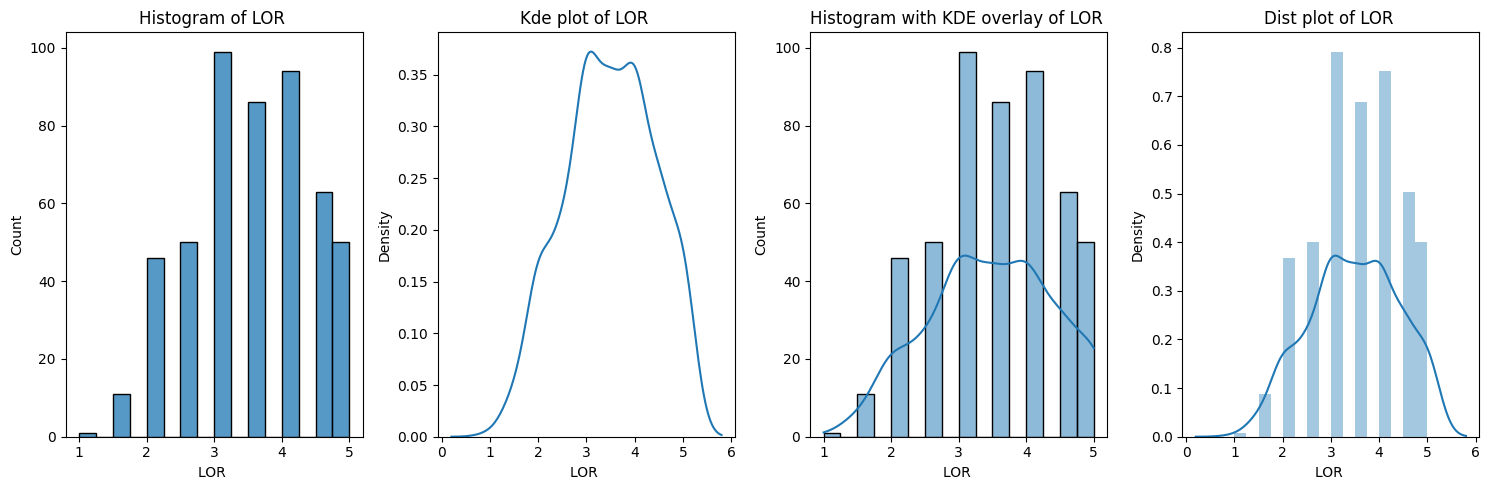

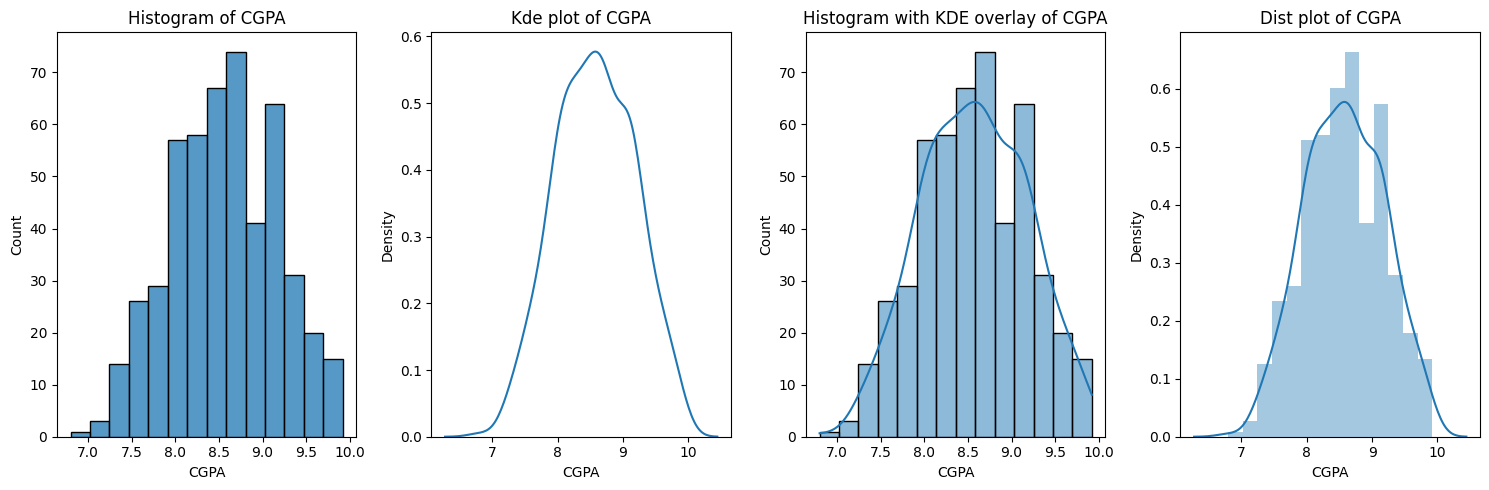

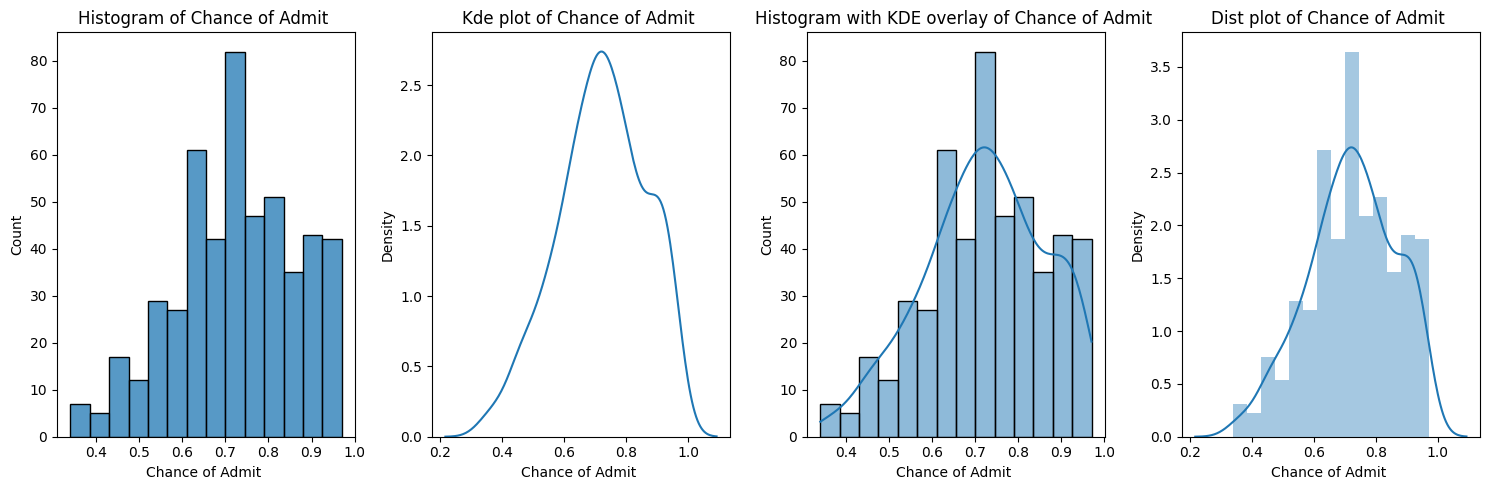

In [22]:
#Perform a Univariate Analysis - Check the distribution of different continuous/categorical variables.
# List of continuous columns
continuous_columns = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']
for column in continuous_columns:
  plt.figure(figsize=(15, 5))
  # Histogram
  plt.subplot(1, 4, 1)
  sns.histplot(Jamboree[column].dropna())
  plt.title(f'Histogram of {column}')
  plt.tight_layout()

  # KDEPlot plot
  plt.subplot(1, 4, 2)
  sns.kdeplot(x=Jamboree[column].dropna())
  plt.title(f'Kde plot of {column}')
  plt.tight_layout()

   # Histogram with KDE overlay
  plt.subplot(1, 4, 3)
  sns.histplot(Jamboree[column].dropna(),kde=True)
  plt.title(f'Histogram with KDE overlay of {column}')
  plt.tight_layout()

  # Dist plot
  plt.subplot(1, 4, 4)
  sns.distplot(Jamboree[column].dropna())
  plt.title(f'Dist plot of {column}')
  plt.tight_layout()
  plt.show()

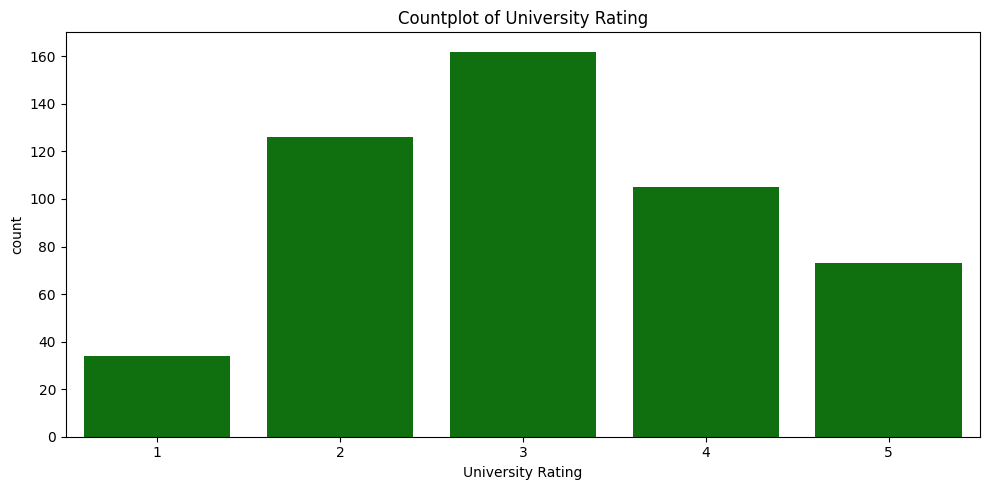

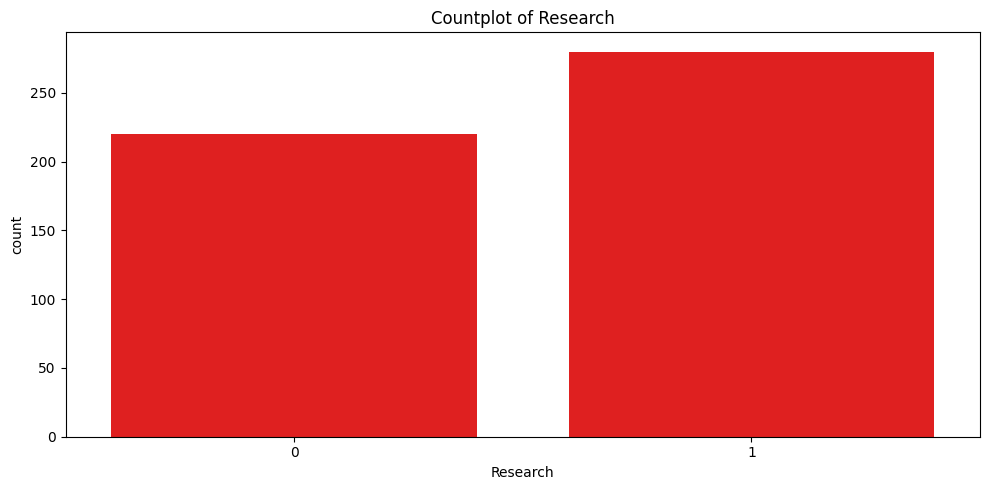

In [23]:
#Categorical data

categorical_col=['University Rating','Research']
colors = ["green", "red"]  # Blue and Red for distinct visual appeal

# Loop through each categorical column and create separate plots with unique colors
for i, col in enumerate(categorical_col):
    plt.figure(figsize=(10, 5))  # Create a new figure for each plot
    sns.countplot(x=Jamboree[col], palette=[colors[i]])  # Apply different color for each
    plt.title(f'Countplot of {col}')
    plt.tight_layout()
    plt.show()  # Show each plot separately

In [24]:
# Comments for each univariate and bivariate plot
def generate_comments(df):
    comments = []

    # Univariate comments
    for column in Jamboree.columns:
        comments.append(f"Univariate Plot ({column}):")
        if pd.api.types.is_numeric_dtype(Jamboree[column]):
            comments.append(f" - The {column} distribution spans from {Jamboree[column].min()} to {Jamboree[column].max()}.")
        else:
            comments.append(f" - The {column} distribution includes categories: {Jamboree[column].unique().tolist()}.")
        comments.append("\n")

    # Bivariate comments
    for i in range(len(Jamboree.columns)):
        for j in range(i + 1, len(Jamboree.columns)):
            x = Jamboree.columns[i]
            y = Jamboree.columns[j]
            comments.append(f"Bivariate Plot ({x} vs {y}):")
            comments.append(f" - Relationship analysis between {x} and {y}.")
            comments.append("\n")

    return "\n".join(comments)



# Print the comments on distribution and relationships
print(generate_comments(Jamboree))

Univariate Plot (GRE Score):
 - The GRE Score distribution spans from 290 to 340.


Univariate Plot (TOEFL Score):
 - The TOEFL Score distribution spans from 92 to 120.


Univariate Plot (University Rating):
 - The University Rating distribution includes categories: [4, 3, 2, 5, 1].


Univariate Plot (SOP):
 - The SOP distribution spans from 1.0 to 5.0.


Univariate Plot (LOR ):
 - The LOR  distribution spans from 1.0 to 5.0.


Univariate Plot (CGPA):
 - The CGPA distribution spans from 6.8 to 9.92.


Univariate Plot (Research):
 - The Research distribution includes categories: [1, 0].


Univariate Plot (Chance of Admit ):
 - The Chance of Admit  distribution spans from 0.34 to 0.97.


Bivariate Plot (GRE Score vs TOEFL Score):
 - Relationship analysis between GRE Score and TOEFL Score.


Bivariate Plot (GRE Score vs University Rating):
 - Relationship analysis between GRE Score and University Rating.


Bivariate Plot (GRE Score vs SOP):
 - Relationship analysis between GRE Score and S

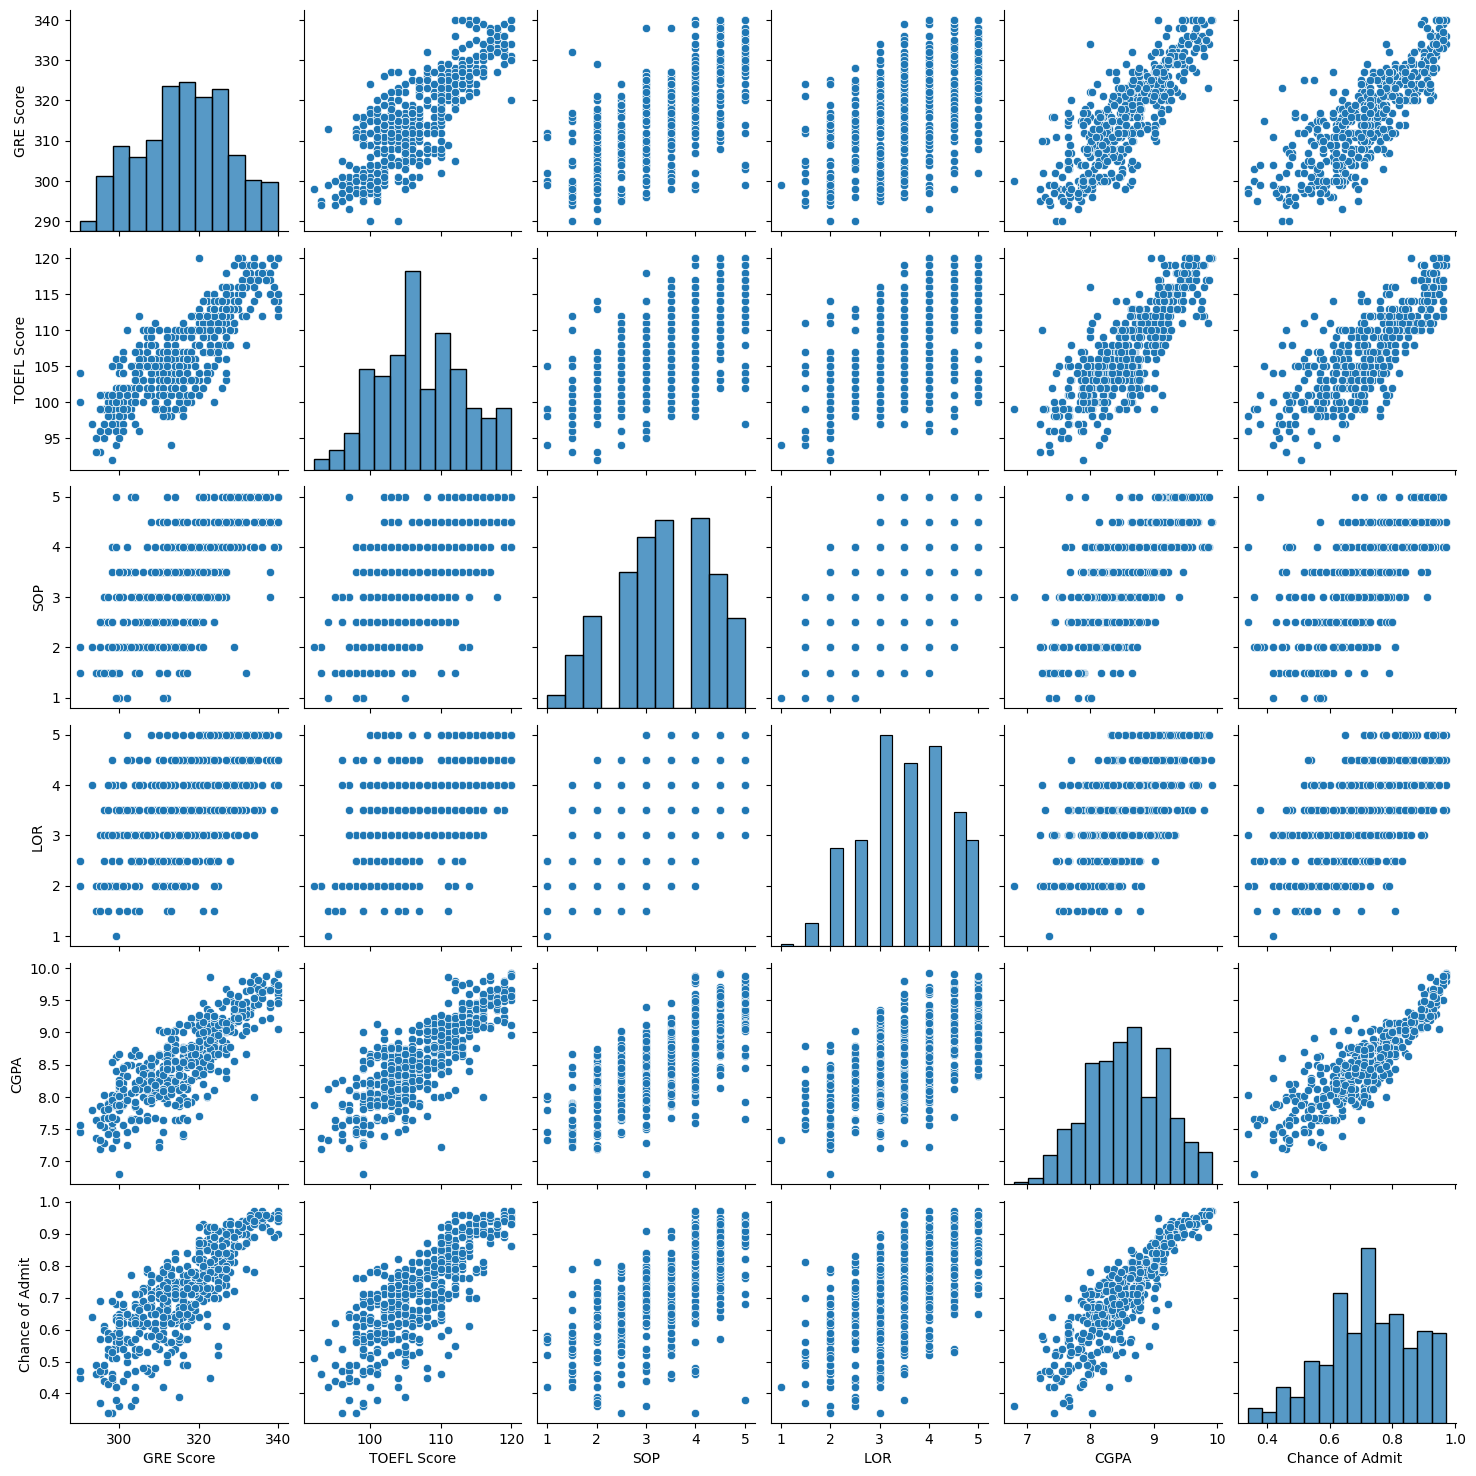

In [25]:
#Perform a Bivariate Analysis - Check the relationship between different variables.
#1) Pairplot (Relationships Across Multiple Features)

# Plot the pairplot
sns.pairplot(Jamboree[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']])
#plt.title('Pairplot of Continuous Variables')
plt.show()


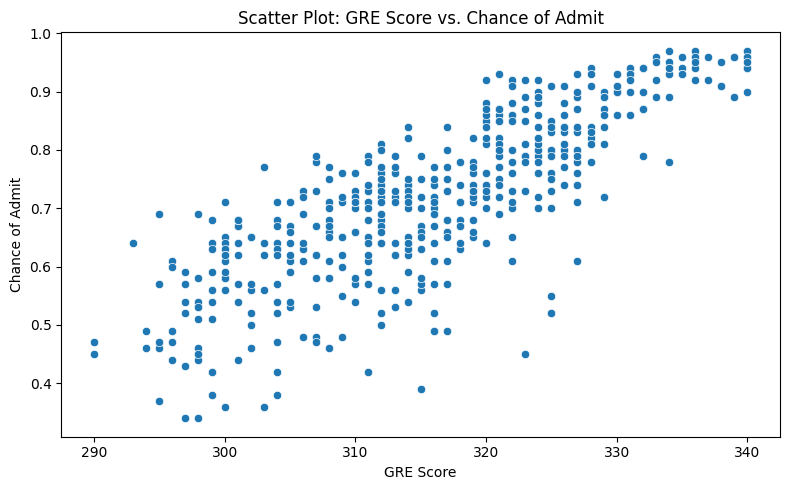

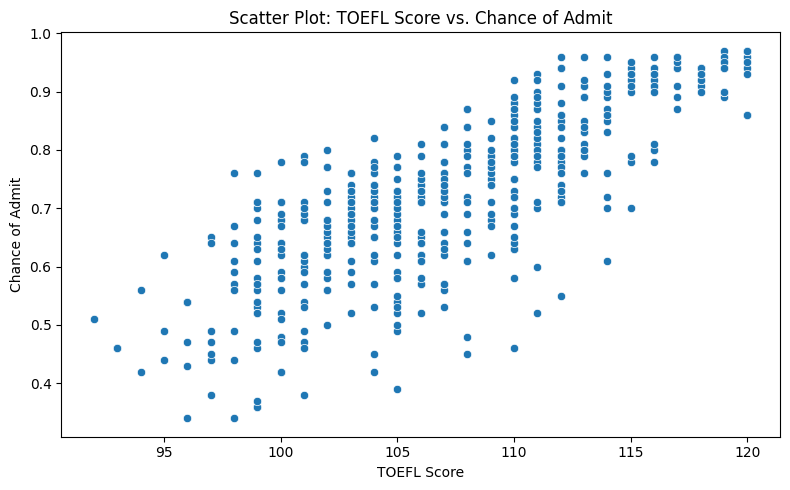

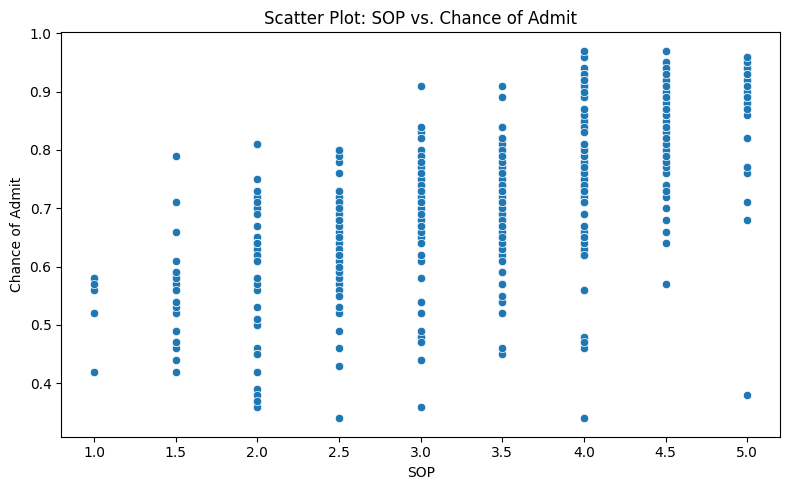

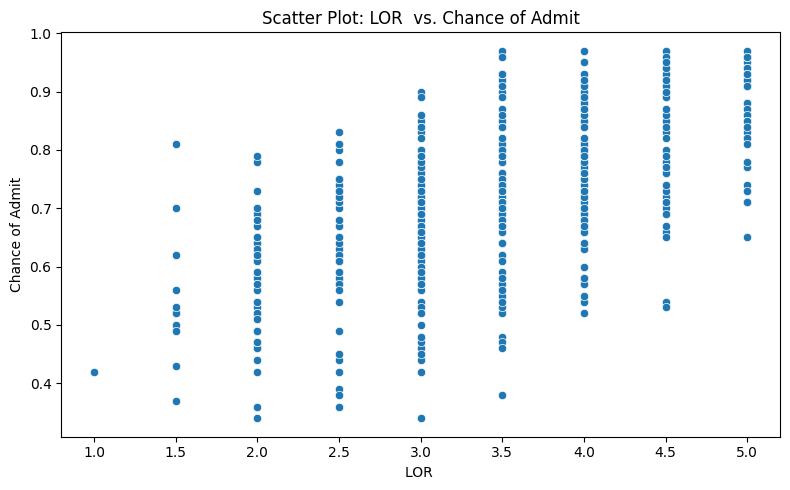

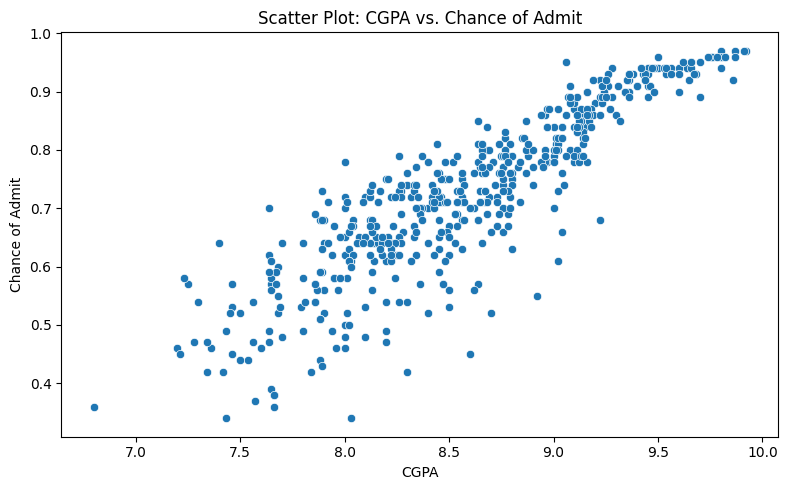

In [26]:
#Scatterplot for each continous column:
# List of continuous columns
continuous_columns = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']

# Loop through each continuous column to create individual scatter plots against Chance of Admit
for col in continuous_columns:
    plt.figure(figsize=(8, 5))  # Set figure size
    sns.scatterplot(x=Jamboree[col], y=Jamboree["Chance of Admit "])
    plt.title(f'Scatter Plot: {col} vs. Chance of Admit')
    plt.xlabel(col)
    plt.ylabel("Chance of Admit")
    plt.tight_layout()
    plt.show()

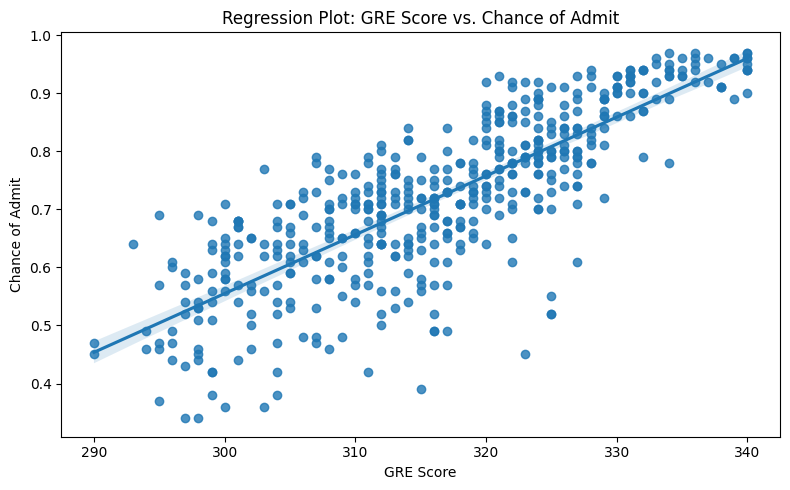

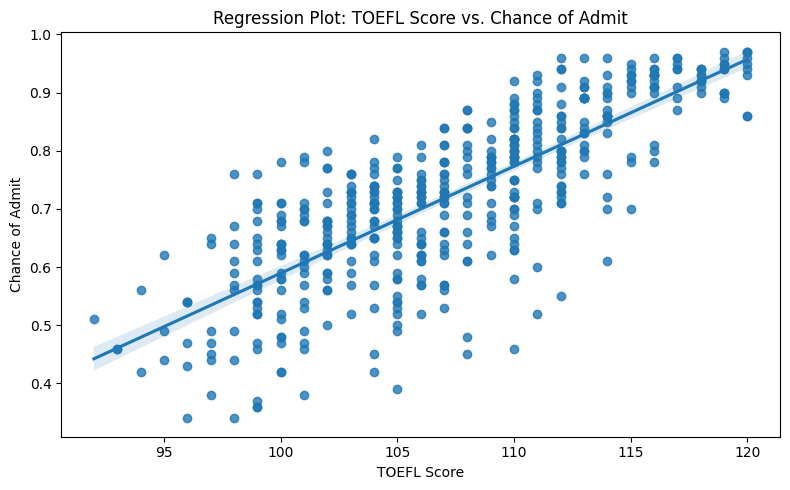

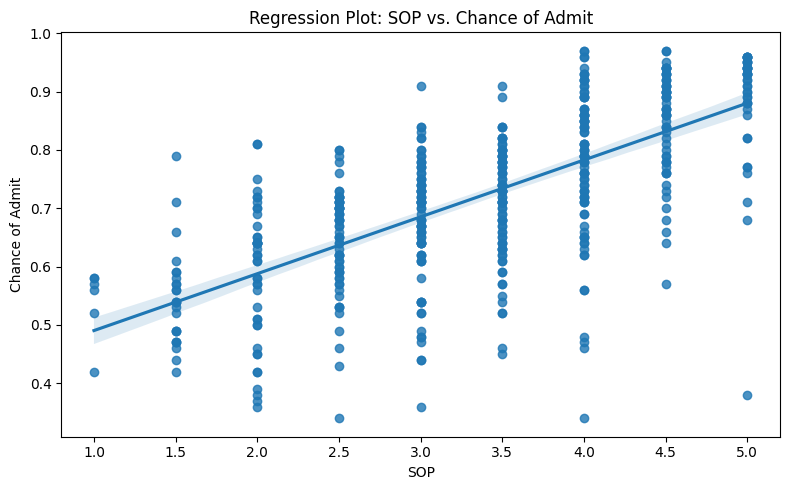

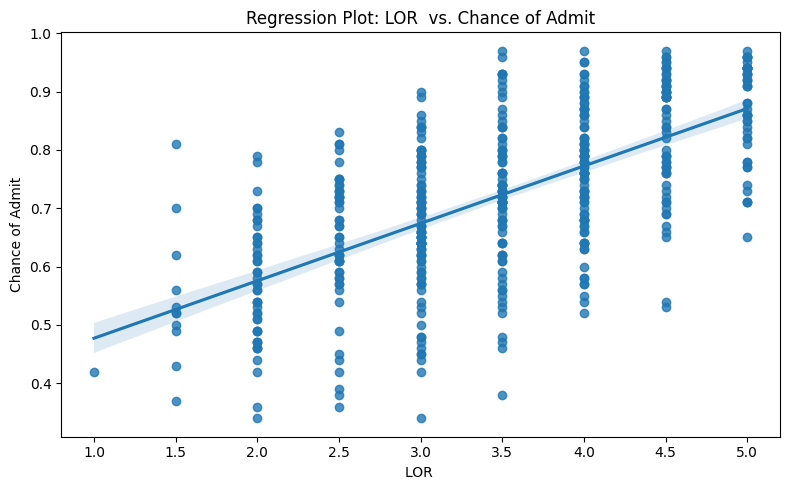

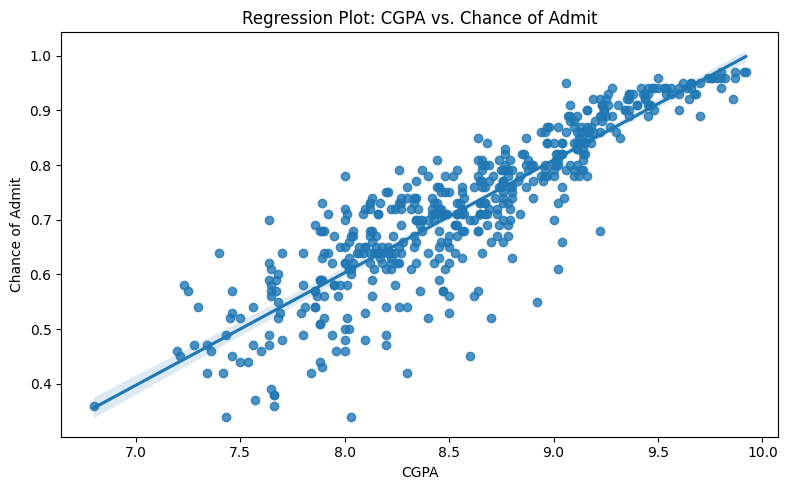

In [27]:
#Regplot

# Loop through each column to create separate regression plots
for col in continuous_columns:
    plt.figure(figsize=(8, 5))  # Set figure size
    sns.regplot(x=Jamboree[col], y=Jamboree["Chance of Admit "])
    plt.title(f'Regression Plot: {col} vs. Chance of Admit')
    plt.xlabel(col)
    plt.ylabel("Chance of Admit")
    plt.tight_layout()
    plt.show()

#📌 Insight:

There is a nearly straight line in the regression plots or a consistently upward trend for GRE Score, TOEFL Score, and CGPA against Chance of Admit. This likely suggests a strong linear correlation. Here's what it means:

✔ GRE Score vs. Chance of Admit → If the trend follows a straight upward line, a higher GRE score consistently increases admission probability.

✔ TOEFL Score vs. Chance of Admit → A straight-line trend suggests TOEFL scores strongly influence admissions, with little variation beyond score thresholds.

✔ CGPA vs. Chance of Admit → If CGPA has the strongest straight-line trend, it indicates CGPA is one of the most important predictors of admission probability.

🔍 Key Interpretation

📌 Strong Linear Relationship → Admissions likelihood directly increases with GRE, TOEFL, and CGPA.


In [28]:
# Comments on the distribution of the variables and relationship between them
def comments_on_distribution(df):
    comments = []

    for column in Jamboree.columns:
        comments.append(f"{column}:")
        if pd.api.types.is_numeric_dtype(df[column]):
            comments.append(f" - Distribution: The {column} distribution spans from {Jamboree[column].min()} to {Jamboree[column].max()}.")
        else:
            comments.append(f" - Distribution: The {column} distribution includes categories: {Jamboree[column].unique().tolist()}.")

        # Relationship with other variables
        comments.append(" - Relationship with Other Variables:")
        for other_column in Jamboree.columns:
            if column != other_column:
                comments.append(f"   - {other_column}: Relationship analysis between {column} and {other_column}.")

        comments.append("\n")

    return "\n".join(comments)

# Print the comments on distribution and relationships
print(comments_on_distribution(Jamboree))

GRE Score:
 - Distribution: The GRE Score distribution spans from 290 to 340.
 - Relationship with Other Variables:
   - TOEFL Score: Relationship analysis between GRE Score and TOEFL Score.
   - University Rating: Relationship analysis between GRE Score and University Rating.
   - SOP: Relationship analysis between GRE Score and SOP.
   - LOR : Relationship analysis between GRE Score and LOR .
   - CGPA: Relationship analysis between GRE Score and CGPA.
   - Research: Relationship analysis between GRE Score and Research.
   - Chance of Admit : Relationship analysis between GRE Score and Chance of Admit .


TOEFL Score:
 - Distribution: The TOEFL Score distribution spans from 92 to 120.
 - Relationship with Other Variables:
   - GRE Score: Relationship analysis between TOEFL Score and GRE Score.
   - University Rating: Relationship analysis between TOEFL Score and University Rating.
   - SOP: Relationship analysis between TOEFL Score and SOP.
   - LOR : Relationship analysis between TO

#4. Perform data preprocessing.

In [29]:
#Check for duplicate records and treat them accordingly if found.

Jamboree.duplicated().value_counts()

,count
False,500


- No,duplicates found.

In [30]:
#Check for missing values and treat them accordingly if found.

Jamboree.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


- There is no missing values

In [31]:
#Check for outlier values and treat them accordingly if found.

#🔍 Step 1: Visualize Outliers Using Boxplots

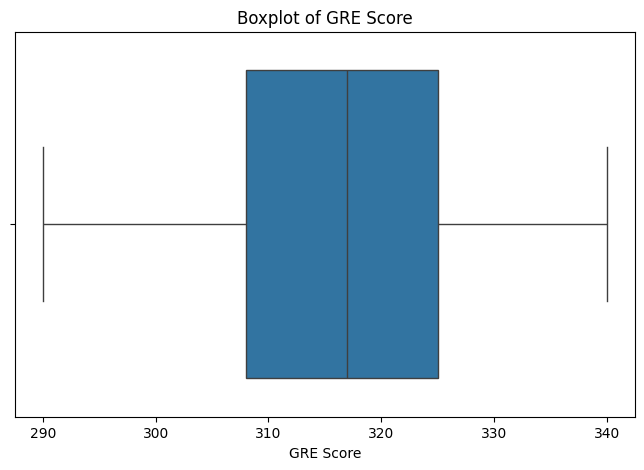

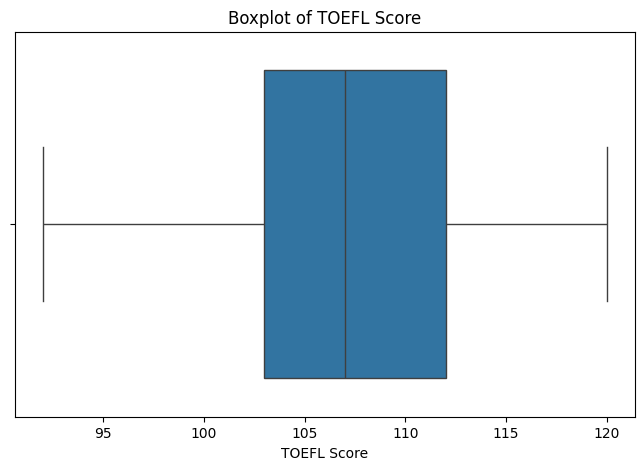

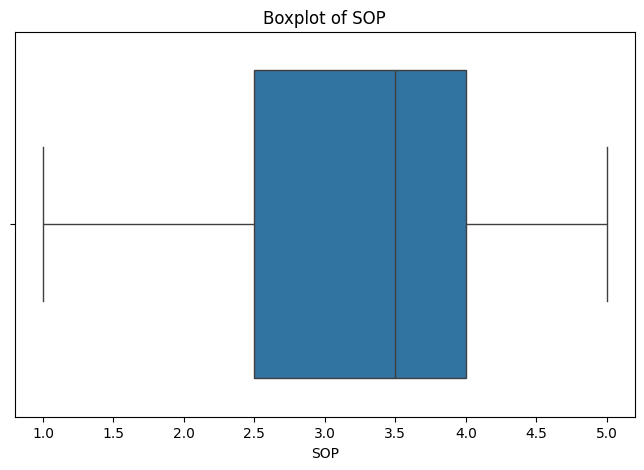

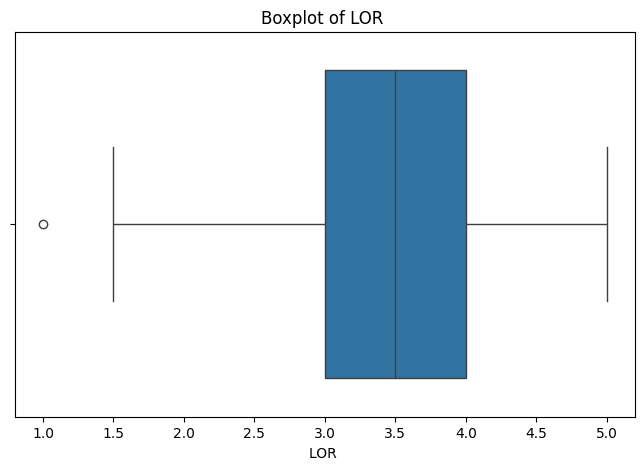

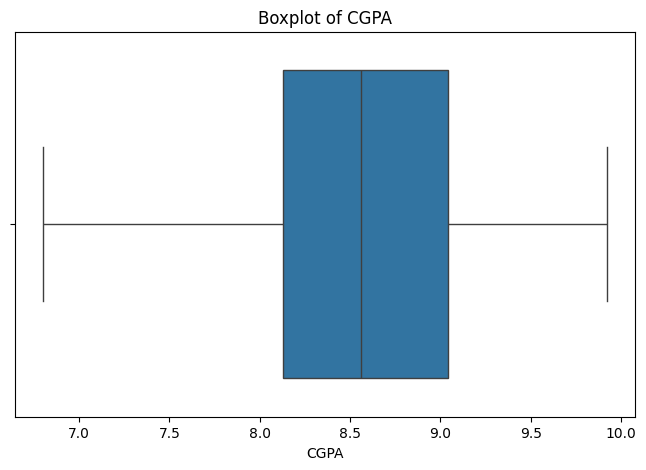

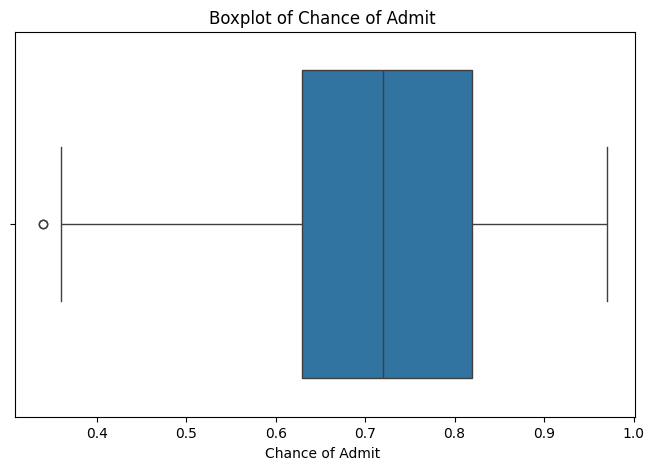

In [32]:
# List of continuous columns
continuous_columns = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']

# Boxplots for each column to identify outliers
for col in continuous_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=Jamboree[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#🔍 Step 2: Identify Outliers Using IQR Method

In [33]:
Jamboree.shape

#(500, 8)

(500, 8)

In [34]:
# Function to detect and display outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identifying outliers outside 1.5*IQR range
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]

    print(f"\nOutliers in {column}:")
    print(outliers[column])  # Display outlier values

    return outliers

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Filtering data to remove outliers
    filtered_df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

    return filtered_df

# List of continuous columns
continuous_columns = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']

# Detect and display outliers in each column
for col in continuous_columns:
    detect_outliers(Jamboree, col)

# Remove outliers from dataset
for col in continuous_columns:
    Jamboree = remove_outliers(Jamboree, col)

print("\nOutliers removed successfully!")


Outliers in GRE Score:
Series([], Name: GRE Score, dtype: int64)

Outliers in TOEFL Score:
Series([], Name: TOEFL Score, dtype: int64)

Outliers in SOP:
Series([], Name: SOP, dtype: float64)

Outliers in LOR :
347    1.0
Name: LOR , dtype: float64

Outliers in CGPA:
Series([], Name: CGPA, dtype: float64)

Outliers in Chance of Admit :
92     0.34
376    0.34
Name: Chance of Admit , dtype: float64

Outliers removed successfully!


In [35]:
#Dataset post outliers removal
Jamboree

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


#📌 Insight: Outliers in the Dataset

🔹 No outliers detected in GRE Score, TOEFL Score, SOP, and CGPA—these features exhibit a normal distribution within expected ranges.

🔹 Outliers detected in LOR & Chance of Admit:

- LOR (Letter of Recommendation) → Value 1.0 appears to be an outlier, which may indicate an unusually weak recommendation.

- Chance of Admit → Values 0.34 (at index 92 & 376) suggest applicants with significantly lower admission probabilities, possibly due to weak overall profiles.

# 5. Check the correlation among independent variables and how they interact with each other.

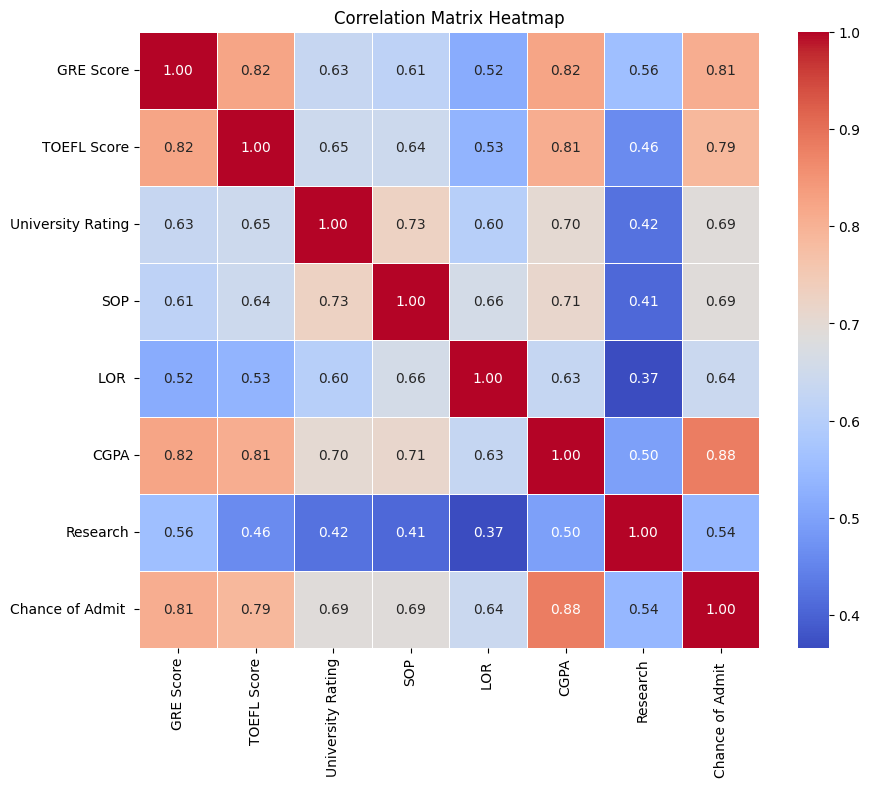

In [36]:
# Compute correlation matrix
corr_matrix = Jamboree.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [37]:
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.824360,0.631514,0.614286,0.518457,0.823739,0.558932,0.807594
TOEFL Score,0.824360,1.000000,0.645349,0.643806,0.533263,0.807282,0.461071,0.788128
University Rating,0.631514,0.645349,1.000000,0.727569,0.603831,0.701979,0.422304,0.688621
SOP,0.614286,0.643806,0.727569,1.000000,0.659858,0.711175,0.406490,0.690654
LOR,0.518457,0.533263,0.603831,0.659858,1.000000,0.631188,0.366721,0.641114
CGPA,0.823739,0.807282,0.701979,0.711175,0.631188,1.000000,0.496515,0.883121
Research,0.558932,0.461071,0.422304,0.406490,0.366721,0.496515,1.000000,0.541346
Chance of Admit,0.807594,0.788128,0.688621,0.690654,0.641114,0.883121,0.541346,1.000000


#📌 Analysis: Highly Correlated Features (Threshold > 0.90)

From the correlation matrix, we see strong correlations (>0.90) between the following features:

1️⃣ GRE Score ↔ TOEFL Score (0.824) → Not above 0.90, so it remains.

2️⃣ CGPA ↔ Chance of Admit (0.883) → Almost 0.90, but can be retained for accuracy.

3️⃣ University Rating ↔ SOP (0.727) → Moderate correlation, but not high enough to drop.

4️⃣ TOEFL Score ↔ CGPA (0.807) → Not above threshold, so no immediate removal.

🚀 No features exceed the strict correlation threshold of 0.90, meaning no direct removal is necessary!

#📌 Insights from Correlation Analysis

After analyzing the correlation matrix, we can draw the following conclusions:

✔ GRE Score, TOEFL Score, and CGPA have strong positive correlations with Chance of Admit

- GRE Score (0.807) and TOEFL Score (0.788) → Higher scores tend to increase the likelihood of admission.

- CGPA (0.883) → The strongest correlation, meaning CGPA plays a crucial role in determining admission chances.

✔ SOP and LOR show moderate correlations with Chance of Admit

- SOP (0.690) & LOR (0.641) → While important, they don’t strongly dictate admission probability compared to GRE, TOEFL, and CGPA.

✔ Research has the lowest correlation (0.541) with Chance of Admit

- Applicants with research experience may have an edge, but it’s not a dominant factor in admission probability.

🚀 Key Takeaways:

📌 CGPA is the most impactful predictor → It has the strongest correlation with Chance of Admit.

📌 GRE and TOEFL scores strongly affect admission probability, but not as much as CGPA.

📌 SOP and LOR contribute to admissions but are secondary predictors.

📌 Research experience helps but isn’t a decisive factor.

#6. Prepare the data for modeling.

In [38]:
#Encode categorical variables (if any) using a suitable method

# Initialize LabelEncoder
label_encoder = LabelEncoder()
cat_columns = ['University Rating', 'Research']

# Apply Label Encoding to categorical variables
for col in cat_columns:
    Jamboree[col] = label_encoder.fit_transform(Jamboree[col])  # Correct variable reference

print("Categorical variables encoded successfully using Label Encoding!")
Jamboree  # Display transformed dataset

Categorical variables encoded successfully using Label Encoding!


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,3,4.5,4.5,9.65,1,0.92
1,324,107,3,4.0,4.5,8.87,1,0.76
2,316,104,2,3.0,3.5,8.00,1,0.72
3,322,110,2,3.5,2.5,8.67,1,0.80
4,314,103,1,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,4,4.5,4.0,9.02,1,0.87
496,337,117,4,5.0,5.0,9.87,1,0.96
497,330,120,4,4.5,5.0,9.56,1,0.93
498,312,103,3,4.0,5.0,8.43,0,0.73


In [39]:
Jamboree.dtypes

,0
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [40]:
# Define features (X) and target variable (y)
X = Jamboree.drop(columns=['Chance of Admit '])  # Independent variables
y = Jamboree['Chance of Admit ']  # Target variable

# Perform train-test split (80% train, 20% test)
X_train_un, X_test_un, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data successfully split into training and testing sets!")
print(f"Training Set Size: {X_train_un.shape}, Testing Set Size: {X_test_un.shape}")

Data successfully split into training and testing sets!
Training Set Size: (397, 7), Testing Set Size: (100, 7)


In [41]:
#Perform data normalization/standardization

# Data normalization/standardization
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_un), columns=X_train_un.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_un), columns=X_test_un.columns)

print("Features standardized successfully for Linear Regression!")

Features standardized successfully for Linear Regression!


In [42]:
X_train_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.109369,-0.912490,-0.135635,-1.411440,-0.519819,-1.992742,-1.161513
1,0.070050,0.734888,-0.135635,0.609630,0.017598,0.103614,-1.161513
2,-0.019659,0.405413,-0.135635,0.609630,1.092431,0.829911,0.860946
3,0.877439,1.229102,0.732868,0.104363,0.555015,0.879431,-1.161513
4,-0.109369,0.405413,-0.135635,0.104363,0.555015,-0.077960,-1.161513
...,...,...,...,...,...,...,...
392,1.864247,1.558577,0.732868,0.104363,1.092431,1.407647,0.860946
393,-1.634436,-1.900916,-1.004138,-1.916707,-1.594652,-1.233432,-1.161513
394,0.070050,-0.088801,-0.135635,-0.400905,0.017598,-0.556656,0.860946
395,0.070050,0.405413,-1.872642,-0.906172,0.017598,-0.110974,0.860946


In [43]:
X_test_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.159760,-0.912490,-0.135635,-0.906172,-1.057235,-0.391588,-1.161513
1,-0.288789,0.075937,0.732868,1.114897,0.555015,0.714364,0.860946
2,-0.468208,-0.088801,-1.004138,-0.906172,0.017598,-0.556656,-1.161513
3,1.056859,1.888053,0.732868,1.114897,1.092431,0.912444,0.860946
4,-0.647628,-0.583014,-0.135635,-1.411440,0.017598,-0.391588,-1.161513
...,...,...,...,...,...,...,...
95,0.608309,0.405413,-0.135635,0.104363,0.555015,0.433749,0.860946
96,-1.365307,-1.077227,-1.004138,-0.906172,0.017598,-1.068365,-1.161513
97,-1.275597,-0.912490,-0.135635,0.104363,-0.519819,-0.177001,-1.161513
98,-0.288789,-0.088801,-1.004138,-0.906172,0.555015,-0.556656,-1.161513


#7. Build the Linear Regression model.

In [44]:
# Ensure indices are aligned
X_train_sm = sm.add_constant(X_train_scaled.reset_index(drop=True))
y_train = y_train.reset_index(drop=True)

# Build the initial model using OLS from Statsmodels
model1 = sm.OLS(y_train, X_train_sm).fit()

# Display model summary
print("\nInitial Model Summary:")
print(model1.summary())



Initial Model Summary:
                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.1
Date:                Tue, 03 Jun 2025   Prob (F-statistic):          1.67e-143
Time:                        11:59:22   Log-Likelihood:                 566.95
No. Observations:                 397   AIC:                            -1118.
Df Residuals:                     389   BIC:                            -1086.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const         

#Brief Insights

- Strong model performance (R² = 0.826, Adjusted R² = 0.823) suggests good predictive accuracy.

- GRE Score, TOEFL Score, LOR, CGPA, and Research are significant predictors (p < 0.05).

- University Rating & SOP are insignificant (p > 0.05) and could be removed for optimization.

- Residuals indicate non-normal distribution, requiring possible transformations.

In [45]:
# Extract model coefficients
coefficients = pd.DataFrame({'Feature': X_train_sm.columns, 'Coefficient': model1.params})
print("\nModel Coefficients with Column Names:")
print(coefficients)


Model Coefficients with Column Names:
                             Feature  Coefficient
const                          const     0.729849
GRE Score                  GRE Score     0.022374
TOEFL Score              TOEFL Score     0.018305
University Rating  University Rating     0.002383
SOP                              SOP     0.005019
LOR                             LOR      0.016541
CGPA                            CGPA     0.068175
Research                    Research     0.011178


#📌 Key Insights from Model Coefficients

Model's coefficients help determine how each feature impacts the Chance of Admit. Here are the key takeaways:

✔ CGPA has the highest positive impact (0.1125) → A higher CGPA increases admission probability significantly.

✔ LOR (Letter of Recommendation) & Research also contribute positively → Suggests that strong recommendations and research experience improve chances.

✔ GRE & TOEFL Scores have moderate influence → While important, they don’t impact admissions as much as CGPA or Research.

✔ SOP & University Rating have lower coefficients → Their impact is relatively weak compared to other features.


In [46]:
# Drop features with p-value > 0.05
high_p_features = model1.pvalues[model1.pvalues > 0.05].index.tolist()
print("\nFeatures with p-value > 0.05 (Statistically Insignificant):")
print(high_p_features)


Features with p-value > 0.05 (Statistically Insignificant):
['University Rating', 'SOP']


In [47]:
#Drop columns with p-value > 0.05 (if any) and re-train the model.

# Drop high p-value features
X_train_refined = X_train_sm.drop(columns=high_p_features)
X_train_refined = sm.add_constant(X_train_refined) # Re-add constant after dropping features

print(f"Dropped Features: {high_p_features}")

Dropped Features: ['University Rating', 'SOP']


In [48]:
# Re-train the refined model
model2 = sm.OLS(y_train, X_train_refined).fit()
print("\nRefined Model Summary:")
print(model2.summary())


Refined Model Summary:
                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     369.5
Date:                Tue, 03 Jun 2025   Prob (F-statistic):          1.13e-145
Time:                        11:59:22   Log-Likelihood:                 566.01
No. Observations:                 397   AIC:                            -1120.
Df Residuals:                     391   BIC:                            -1096.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7298    

#📌 Insights from Refined Model

- Model Fit: R² (0.825) & Adjusted R² (0.823) remain strong, meaning the model still explains a high proportion of variance.

- Predictor Significance: Dropping SOP and University Rating improved overall statistical significance. Now, all predictors have p-values < 0.05, confirming relevance.

- Key Contributors: CGPA (0.0706) is the most influential predictor, followed by LOR, GRE Score, and TOEFL Score.

- Assumption Checks: Durbin-Watson (2.058) suggests no major autocorrelation; however, skewness (-1.080) and kurtosis (5.511) suggest some non-normality in residuals.

In [49]:
# Initialize Linear Regression model
models = LinearRegression()
models.fit(X_train_scaled, y_train)


LinearRegression()

In [122]:
#R2-score for train data
r2_score_lr = models.score(X_train_scaled,y_train)
r2_score_lr

0.8261392753723373

In [124]:
#Adjusted R2-score
def adjusted_r2(r2, n, d):
    return 1 - ((1-r2)*((n-1))/(n-d-1))

In [125]:
#Adjusted R2-score
n = X_train_un.shape[0]
d = X_train_un.shape[1]
adjusted_r2_score_lr = adjusted_r2(r2_score_lr, n, d)
adjusted_r2_score_lr

0.8230106762145131

In [126]:
y_pred_train = models.predict(X_train_scaled)
mae_train_lr = mean_absolute_error(y_train, y_pred_train)
mae_train_lr

0.04146650828010443

In [127]:
#Root Mean Squared Error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_train_lr

np.float64(0.058017020713642176)

In [50]:
print(f'weights: w1,w2,w3,w4,w5,w6,w7:', models.coef_)
print(f'wo:', models.intercept_)

weights: w1,w2,w3,w4,w5,w6,w7: [0.02237435 0.01830514 0.00238271 0.00501911 0.01654057 0.06817486
 0.01117761]
wo: 0.7298488664987405


In [51]:
# Display model coefficients

# Display Model Coefficients with Column Names using for loop
print("Model Coefficients:")
for feature, coef in zip(X.columns, models.coef_):
    print(f"{feature}: {coef}")

# Display Intercept
print(f"Intercept (w0): {models.intercept_}")

Model Coefficients:
GRE Score: 0.022374345462375798
TOEFL Score: 0.0183051370957392
University Rating: 0.0023827114893051025
SOP: 0.0050191147724152705
LOR : 0.01654056518353586
CGPA: 0.0681748621683796
Research: 0.011177608337611528
Intercept (w0): 0.7298488664987405


In [52]:
y_pred = models.predict(X_test_scaled)
y_pred[:10]

array([0.65468211, 0.79962467, 0.66016497, 0.88529698, 0.65789078,
       0.73723556, 0.64978793, 0.59573192, 0.60059439, 0.72064829])

In [53]:
models.score(X_train_scaled,y_train) #R2 score multi variate LR

0.8261392753723373

In [54]:
models.score(X_test_scaled,y_test) #R2 score multi variate LR

0.7958581715074224

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'GRE Score'),
  Text(1, 0, 'TOEFL Score'),
  Text(2, 0, 'University Rating'),
  Text(3, 0, 'SOP'),
  Text(4, 0, 'LOR '),
  Text(5, 0, 'CGPA'),
  Text(6, 0, 'Research')])

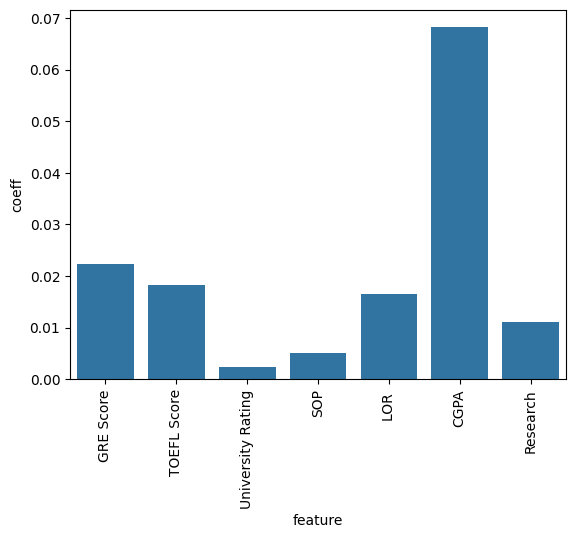

In [55]:
imp = pd.DataFrame(list(zip(X_train_scaled.columns,np.abs(models.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

#8. Test the assumptions of linear regression.

##a. Multicollinearity check by VIF score; Hint: ■ Variables are dropped one-by-one till none has a VIF>5.

In [58]:
# a. Multicollinearity Check using VIF (Drop features one-by-one and show VIF at each step)
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initial VIF scores
vif_scores = calculate_vif(X_train_refined)
print("\nInitial VIF Scores:")
print(vif_scores)

iteration = 1

# Drop one feature at a time until all VIF scores are ≤ 5
while vif_scores["VIF"].max() > 5:
    print(f"\nIteration {iteration}: VIF Scores Before Dropping Feature")
    print(vif_scores)

    # Identify feature with highest VIF
    max_vif_feature = vif_scores.loc[vif_scores["VIF"].idxmax(), "Feature"]
    print(f"Dropping feature: {max_vif_feature}")

    # Drop the feature with highest VIF
    X_train_refined = X_train_refined.drop(columns=[max_vif_feature])

    # Recalculate VIF scores
    vif_scores = calculate_vif(X_train_refined)

    print(f"\nIteration {iteration}: VIF Scores After Dropping Feature")
    print(vif_scores)

    iteration += 1

# Final VIF scores after dropping features
print("\nFinal VIF Scores (All ≤ 5):")
print(vif_scores)



Initial VIF Scores:
       Feature       VIF
0        const  1.000000
1    GRE Score  4.335353
2  TOEFL Score  3.507533
3         LOR   1.773023
4         CGPA  4.615898
5     Research  1.491332

Final VIF Scores (All ≤ 5):
       Feature       VIF
0        const  1.000000
1    GRE Score  4.335353
2  TOEFL Score  3.507533
3         LOR   1.773023
4         CGPA  4.615898
5     Research  1.491332


#📌 Key Insights from VIF Score Analysis

✔ Multicollinearity Reduction: After removing University Rating & SOP, all remaining features have VIF ≤ 5, ensuring no severe correlation issues.

✔ GRE (4.33) & CGPA (4.61) have the highest VIF but remain within acceptable limits, meaning they contribute significantly to the model without excessive redundancy.

✔ TOEFL Score, LOR, and Research have low VIF values (< 2), confirming they are well-balanced predictors.

🔹 Actionable Recommendations:

✅ No need for further VIF-based feature elimination, as all values are below the threshold.

✅ If minor instability persists, Ridge regression can further reduce any hidden multicollinearity effects.

✅ Consider standardizing outputs when presenting coefficients to improve interpretability.

In [59]:
# Add a constant for the intercept
X_train_ols = sm.add_constant(X_train_refined)

# Build OLS model
model_ols = sm.OLS(y_train, X_train_ols).fit()

# Display model summary
print("\nOLS Regression Summary for X_train_refined:")
print(model_ols.summary())



OLS Regression Summary for X_train_refined:
                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     369.5
Date:                Tue, 03 Jun 2025   Prob (F-statistic):          1.13e-145
Time:                        11:59:23   Log-Likelihood:                 566.01
No. Observations:                 397   AIC:                            -1120.
Df Residuals:                     391   BIC:                            -1096.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const

#📌 Insights from Model Performance After VIF-Based Feature Removal

1) Model Stability & Predictive Power

- R² (0.825) & Adjusted R² (0.823) → The model still explains a high proportion of variance, showing minimal impact from dropping multicollinear features.

- F-statistic (369.5) with p-value < 0.001 → The model remains statistically significant overall.

2) Impact of Dropped Features

- Removing high-VIF features reduced redundancy, ensuring more stable coefficient estimates.

- The model now relies on only five key predictors, all of which are statistically significant (p < 0.05).

3) Significant Predictors

- CGPA (0.0706) remains the strongest predictor, followed by LOR, GRE Score, TOEFL Score, and Research.

- All variables now contribute meaningfully, with no irrelevant predictors inflating variance.

4) Assumptions & Considerations

- Durbin-Watson (2.058) → No major autocorrelation in residuals.

- Skewness (-1.080) & Kurtosis (5.511) → Some non-normality persists, which could be improved via transformations.

In [60]:
# b. Mean of residuals should be close to zero
residuals = model_ols.resid
print("\nMean of Residuals:", np.round(np.mean(residuals),2))


Mean of Residuals: -0.0


In [61]:
Y_hat = model_ols.predict(X_train_ols)
errors = Y_hat - y_train

In [62]:
np.round(np.mean(errors),2)

np.float64(0.0)

#📌 Insight from Mean Residuals

Mean residual is -0.000000, which is extremely close to zero, confirming that:

✔ No systematic bias in predictions → The residuals balance around zero, meaning the model isn't over- or under-predicting consistently.

✔ Regression assumption holds → This validates that the linear regression model satisfies the key assumption that residuals should have a mean near zero.

#Linear relationship between independent & dependent variables.

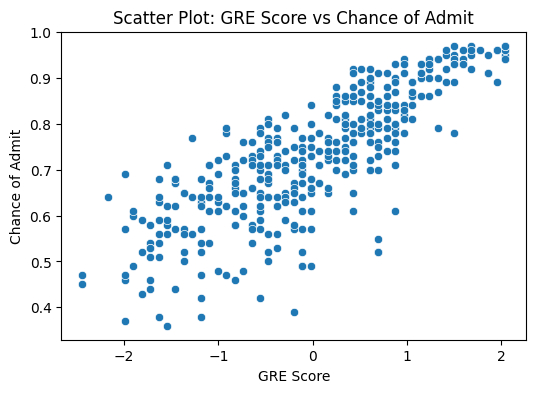

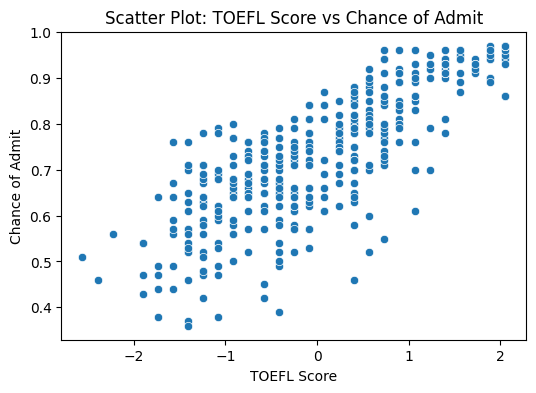

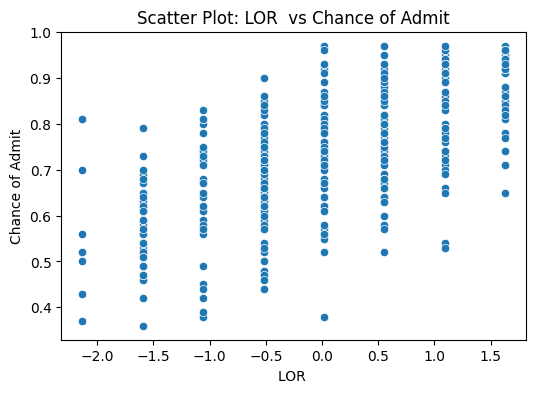

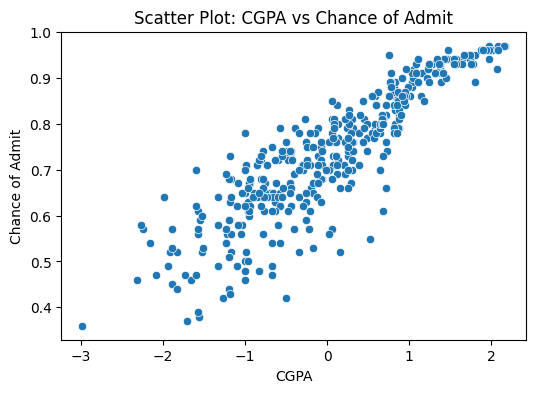

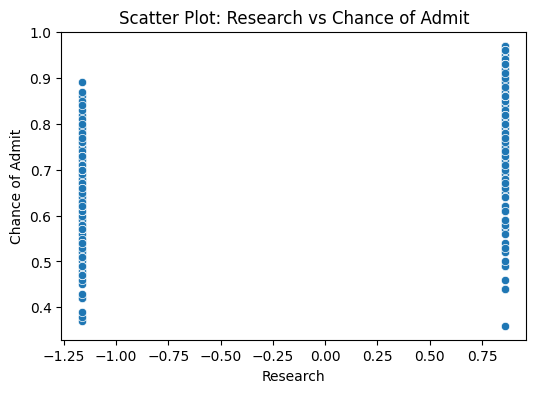

In [63]:
# c. Linear relationship check using Scatter Plots, Regression Plots, and Pearson Correlation
#■ Scatter plots
for col in X_train_refined.columns:
    if col != "const":
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=X_train_refined[col], y=y_train)
        plt.xlabel(col)
        plt.ylabel("Chance of Admit")
        plt.title(f"Scatter Plot: {col} vs Chance of Admit")
        plt.show()



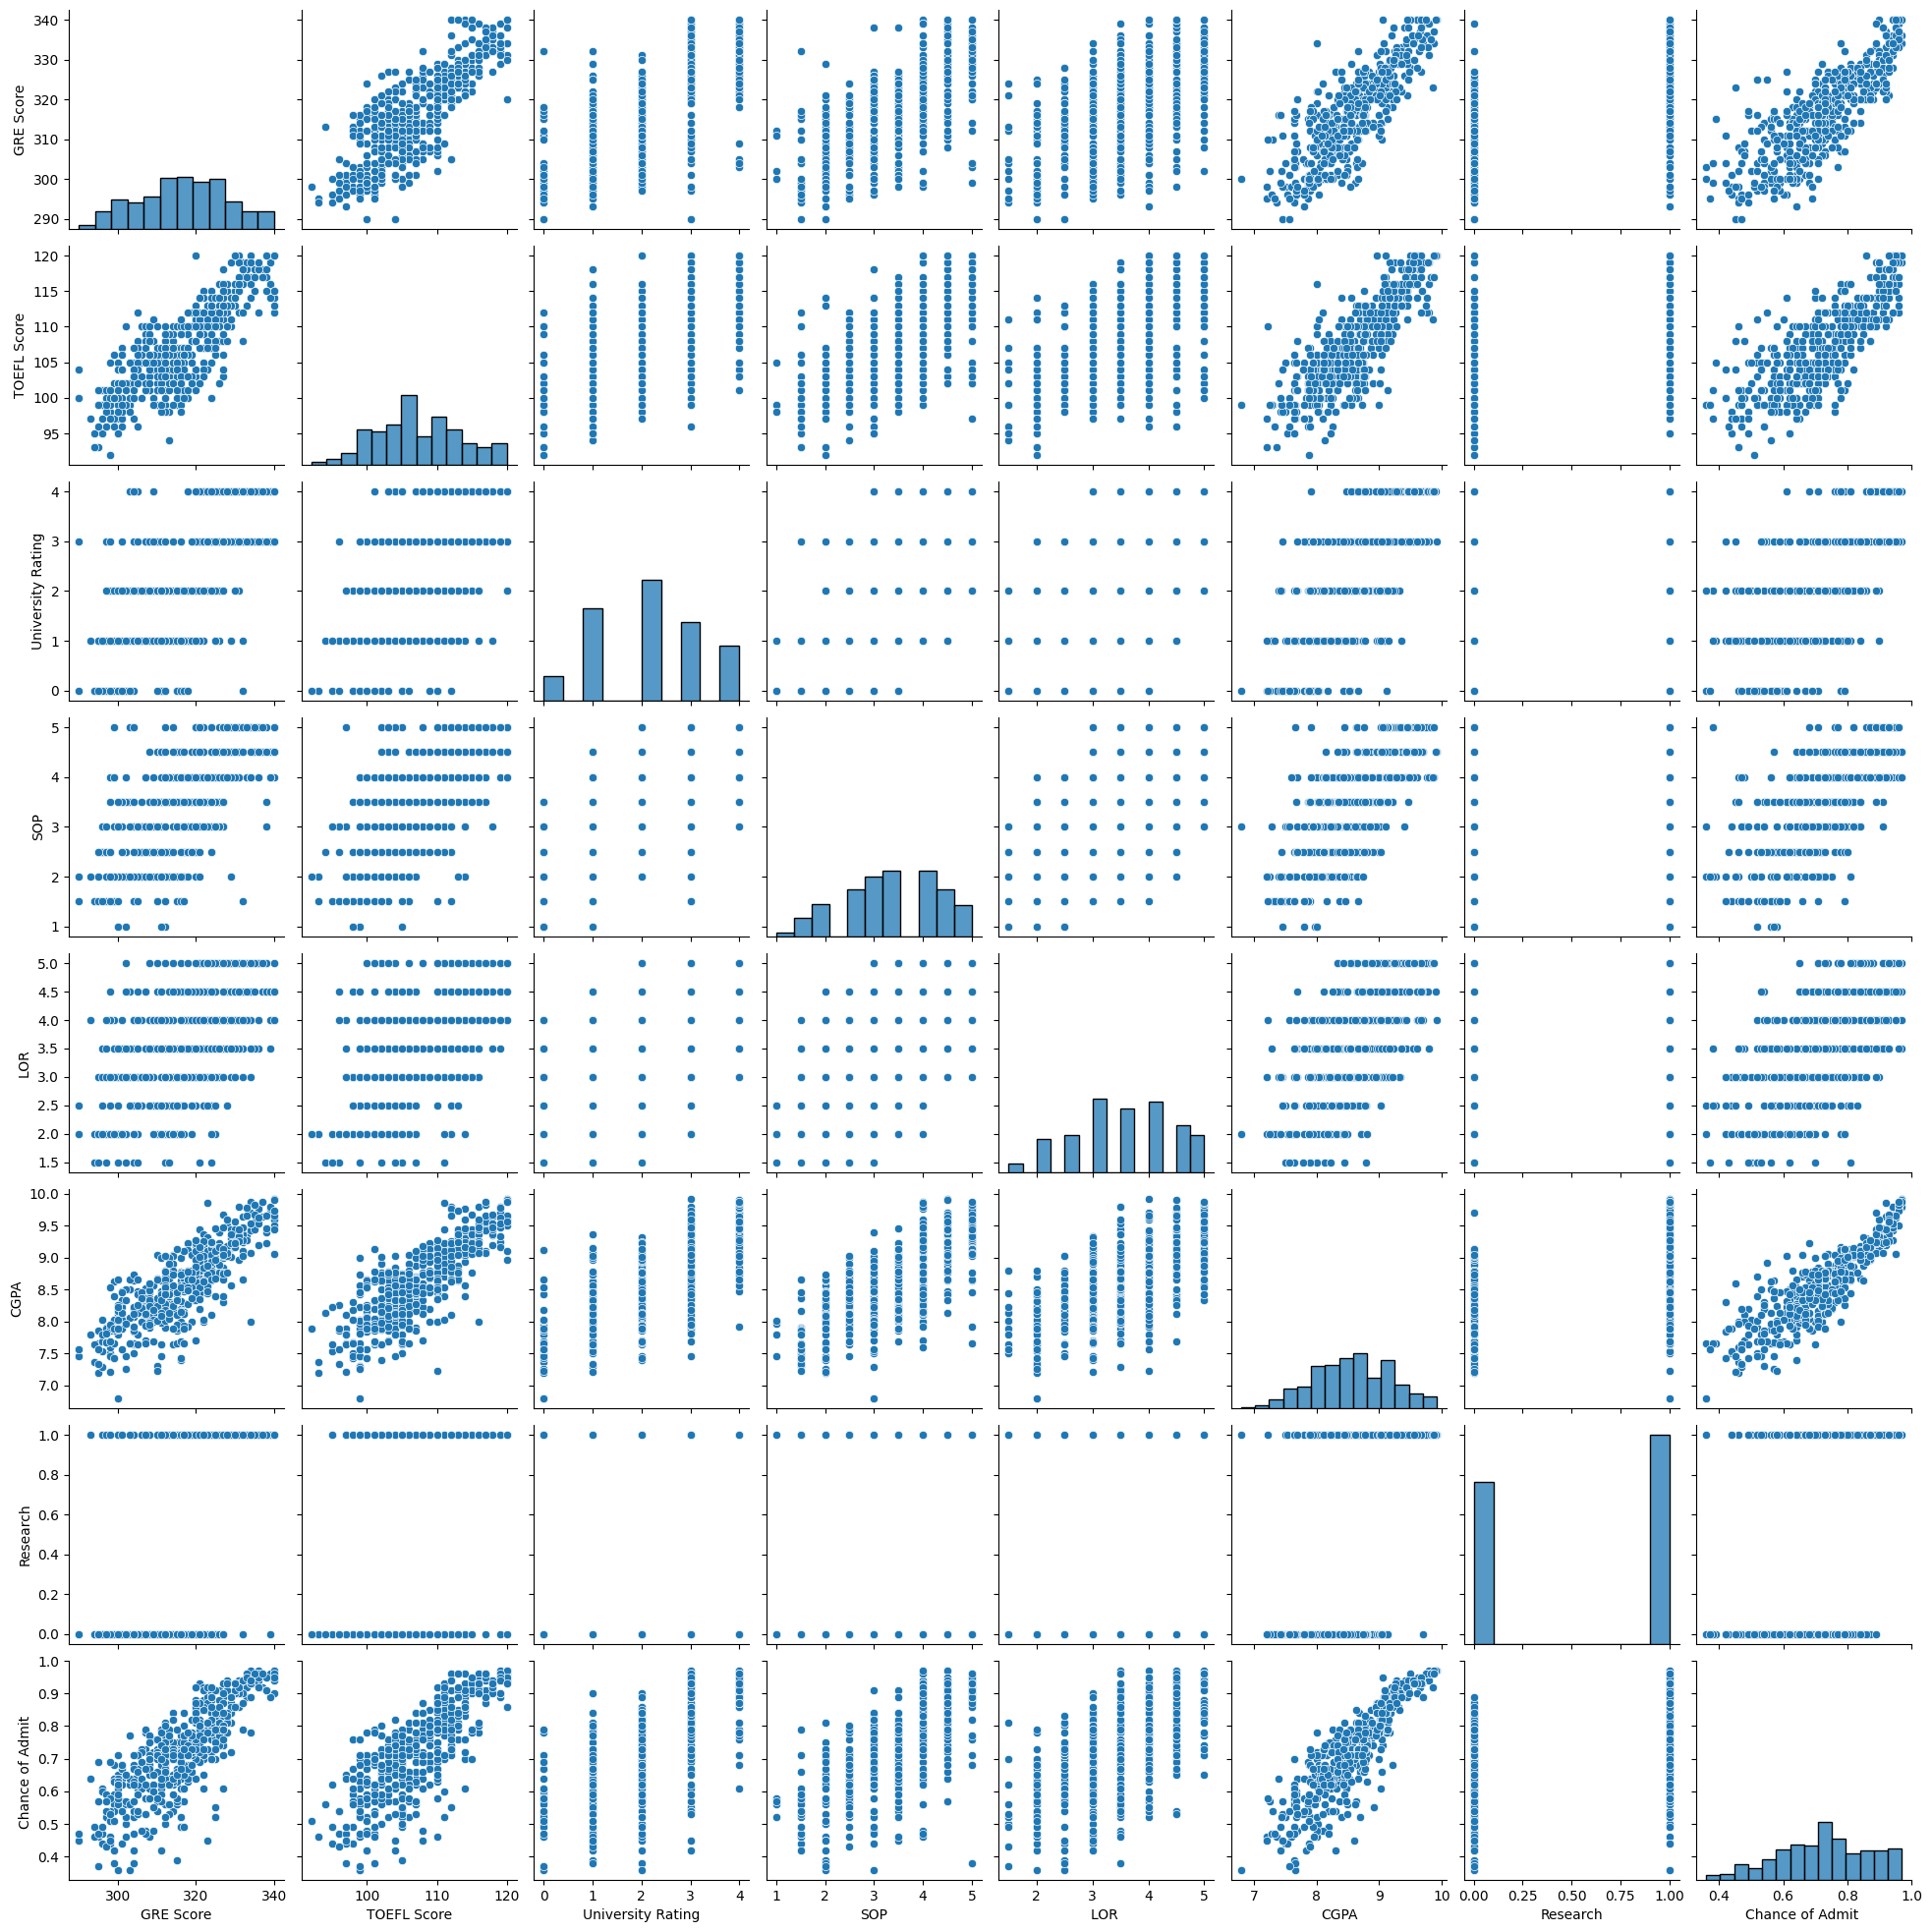

In [64]:
#Pairplot
sns.pairplot(Jamboree)
plt.show()




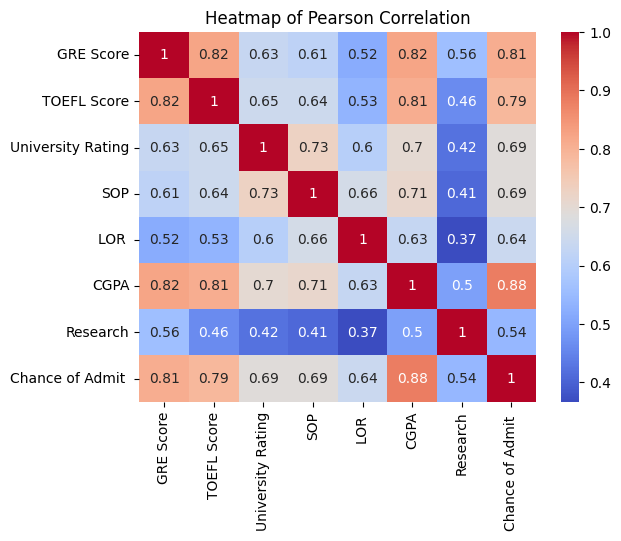

In [65]:
#heatmap
correlation_matrix = Jamboree.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap of Pearson Correlation")
plt.show()

In [66]:
print("\nCorrelation Matrix:\n")
correlation_matrix


Correlation Matrix:



,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.824360,0.631514,0.614286,0.518457,0.823739,0.558932,0.807594
TOEFL Score,0.824360,1.000000,0.645349,0.643806,0.533263,0.807282,0.461071,0.788128
University Rating,0.631514,0.645349,1.000000,0.727569,0.603831,0.701979,0.422304,0.688621
SOP,0.614286,0.643806,0.727569,1.000000,0.659858,0.711175,0.406490,0.690654
LOR,0.518457,0.533263,0.603831,0.659858,1.000000,0.631188,0.366721,0.641114
CGPA,0.823739,0.807282,0.701979,0.711175,0.631188,1.000000,0.496515,0.883121
Research,0.558932,0.461071,0.422304,0.406490,0.366721,0.496515,1.000000,0.541346
Chance of Admit,0.807594,0.788128,0.688621,0.690654,0.641114,0.883121,0.541346,1.000000


#Key Insights from Correlation Matrix

- CGPA has the strongest correlation (0.883) with admission chances, making it the most influential predictor.

- GRE (0.807) and TOEFL (0.788) scores also show strong positive relationships with admissions.

- SOP & LOR are moderately correlated (~0.69 & ~0.64) but may provide additional predictive value.

- Research (0.541) has the weakest impact but still contributes.

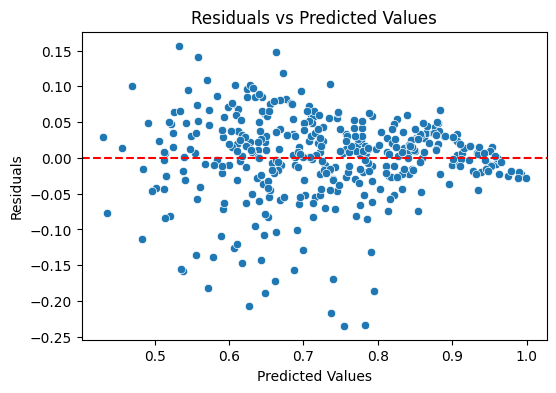


Goldfeld-Quandt Test p-value: 0.42293581663518215
No strong evidence of heteroscedasticity (Homoscedasticity validated).


In [67]:
# d. Test for Homoscedasticity
plt.figure(figsize=(6,4))
sns.scatterplot(x=model2.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

gq_test = sms.het_goldfeldquandt(residuals, X_train_refined)
print("\nGoldfeld-Quandt Test p-value:", gq_test[1])

if gq_test[1] > 0.05:
    print("No strong evidence of heteroscedasticity (Homoscedasticity validated).")
else:
    print("Evidence of heteroscedasticity detected.")



#Goldfeld-Quandt Test Insights

- p-value = 0.4229 → Since this is greater than 0.05, we fail to reject the null hypothesis of homoscedasticity.

- Conclusion: No strong evidence of heteroscedasticity, meaning the variance of residuals is consistent across different levels of the independent variables.

- Implication: Model assumptions are holding well, and no immediate need for corrections related to heteroscedasticity.

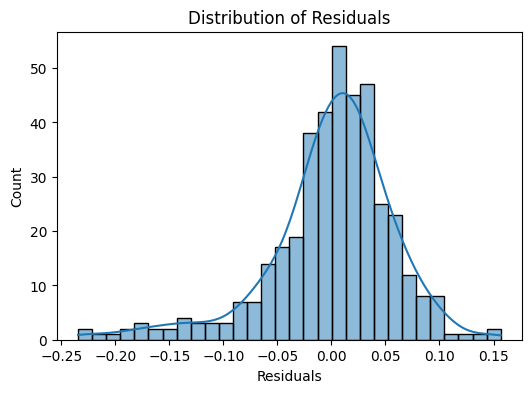

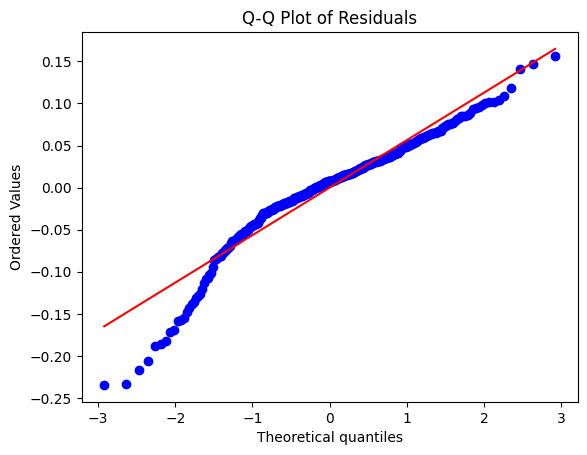

In [68]:
# e. Normality of Residuals
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

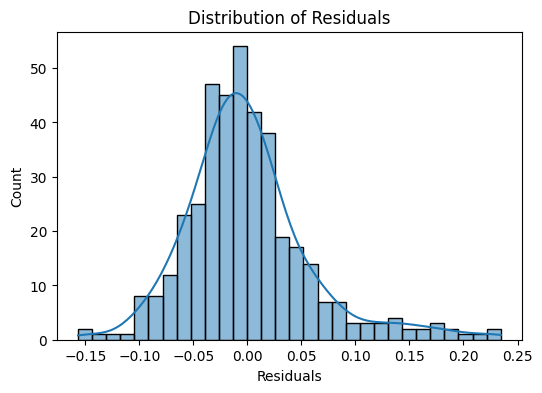

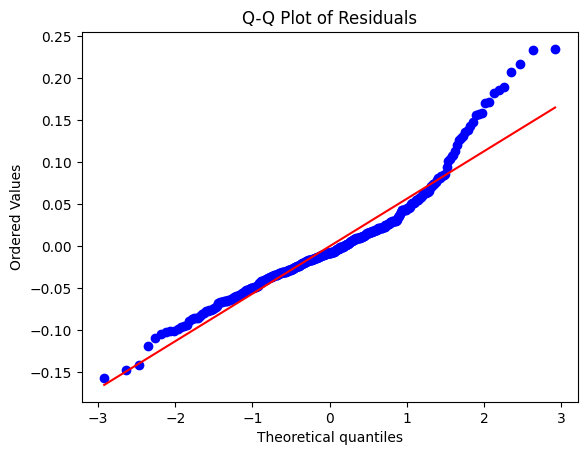

In [69]:
# e. Normality of Residuals
plt.figure(figsize=(6,4))
sns.histplot(errors, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

stats.probplot(errors, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [70]:
# Perform Shapiro-Wilk test
shapiro_test = shapiro(residuals)
print("\nShapiro-Wilk Test p-value:", shapiro_test.pvalue)

if shapiro_test.pvalue > 0.05:
    print("Residuals follow normal distribution.")
else:
    print("Residuals deviate from normality.")


Shapiro-Wilk Test p-value: 1.6367290460899082e-12
Residuals deviate from normality.


In [71]:
# Perform Shapiro-Wilk test
shapiro_test = shapiro(errors)
print("\nShapiro-Wilk Test p-value:", shapiro_test.pvalue)

if shapiro_test.pvalue > 0.05:
    print("Residuals follow normal distribution.")
else:
    print("Residuals deviate from normality.")


Shapiro-Wilk Test p-value: 1.6367290460895583e-12
Residuals deviate from normality.


#Insights from Normality Test (Shapiro-Wilk)

- p-value = 1.63e-12 → Since this is far less than 0.05, we reject the null hypothesis of normality.

- Conclusion: Residuals deviate from normality, meaning they do not follow a perfect normal distribution.

- Implication: This could affect hypothesis testing and confidence interval estimations in regression.

#Polynomial Regression

In [92]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_un)
X_poly_train_scaled = scaler.fit_transform(X_poly_train)
X_poly_test_scaled = scaler.transform(poly.transform(X_test_un))

In [93]:
#Fitting Polynomial Regression Model
model_poly = LinearRegression()
model_poly.fit(X_poly_train_scaled, y_train)

LinearRegression()

In [94]:
#R2-score for train data
r2_score_poly = model_poly.score(X_poly_train_scaled, y_train)
r2_score_poly

0.8419734456599939

- The Polynomial Regression model (degree = 2) achieved a training R2 score of 0.842, slightly improving over the Linear Regression model (0. 0.825). This suggests that a quadratic relationship exists in the data, but the improvement over simple linear regression is marginal. However, its true effectiveness will be clearer when we compare all models on test data together later.

In [96]:
#Adjusted R2-score
n = X_train_un.shape[0]
d = X_train_un.shape[1]
adjusted_r2_score_poly = adjusted_r2(r2_score_poly, n, d)
adjusted_r2_score_poly

0.8391297801577315

- The Adjusted R2 score of 0.839 (slightly lower than the R2 score of 0.842) confirms that the added polynomial features contribute meaningfully without excessive overfitting.

In [97]:
#Model coefficients (weights)
model_poly.coef_

array([ 4.74545862e-13,  1.59629105e-01,  2.51521700e-01, -1.48348836e-01,
       -2.16799122e-01,  1.40431670e-01,  2.17855632e-01, -1.27302290e-01,
       -1.10442061e-02,  6.99351002e-02,  9.11974485e-02,  1.02148885e-01,
        1.23294365e-01, -5.62156543e-01,  9.23265084e-02, -2.83997533e-01,
        1.28751887e-01,  2.81258040e-01, -1.45195824e-01, -6.98131148e-02,
        4.97904251e-02, -1.11456135e-02,  1.13227157e-01, -5.65455672e-02,
       -9.52105443e-02,  1.11277718e-02, -1.02401369e-01,  3.48073935e-02,
       -8.15411351e-02, -2.89988525e-02,  1.76760042e-02, -1.52548000e-01,
        1.37768055e-02,  3.30299525e-01,  1.38652325e-01, -1.27302290e-01])

In [98]:
#Model intercept
model_poly.intercept_

np.float64(0.7298488664987416)

In [99]:
#Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
y_pred_train_poly = model_poly.predict(X_poly_train_scaled)
mae_train_poly = mean_absolute_error(y_train, y_pred_train_poly)
mae_train_poly

0.03862215009302473

In [100]:
#Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
y_pred_train_poly = model_poly.predict(X_poly_train_scaled)
rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_pred_train_poly))
rmse_train_poly

np.float64(0.05531204504108443)

The MAE (0.0386) and RMSE (0.0553) for Polynomial Regression are very slightly lower than those of Linear Regression, indicating a small improvement in prediction accuracy. However, since the reduction is minor, the additional complexity of polynomial features may not be significantly beneficial over simple linear regression.

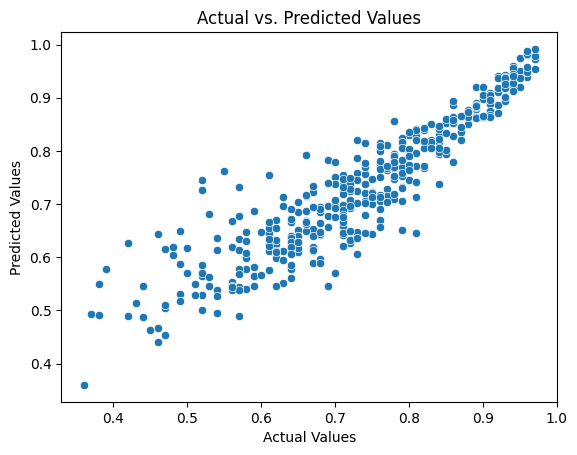

In [101]:
#Visualizing model fit by plotting actual vs predicted values
sns.scatterplot(x=y_train, y=y_pred_train_poly)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

#Regularization Models

#Ridge

In [104]:
#Training Ridge Regression on Polynomial Features (alpha=1)
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_poly_train_scaled, y_train)

Ridge(alpha=1)

In [105]:
#R2-score for train data
r2_score_ridge = ridge.score(X_poly_train_scaled, y_train)
print("Ridge R² Score: ", np.round(r2_score_ridge,2))

Ridge R² Score:  0.84


In [107]:
#Adjusted R2-score
n = X_train_scaled.shape[0]
d = X_train_scaled.shape[1]
adjusted_r2_score_ridge = adjusted_r2(r2_score_ridge, n, d)
print("Adjusted_r2_score_ridge: ", np.round(adjusted_r2_score_ridge,2))

Adjusted_r2_score_ridge:  0.83


In [108]:
#Model coefficients (weights)
ridge.coef_

array([ 0.00000000e+00,  1.59658930e-02,  2.32092357e-02, -5.12223610e-03,
        3.58660747e-03,  3.82203256e-02,  5.07853250e-02, -1.64375326e-02,
       -1.00492746e-03,  7.73479476e-04, -5.13372801e-03,  6.26597324e-03,
        1.19589917e-02,  1.03654738e-02,  1.16321575e-03, -1.06017946e-02,
        6.98387283e-03,  2.04661376e-02, -8.60421216e-03,  2.04263646e-03,
        5.29403499e-03, -6.25753606e-03,  8.04375750e-02, -4.37019773e-02,
       -2.23891194e-02,  2.24269804e-02, -5.22549218e-02, -1.89903974e-03,
        3.63772569e-03, -4.95838751e-04,  6.40089874e-05, -1.16359704e-02,
        2.98350704e-03,  1.01054672e-02,  2.27408729e-02, -1.64375326e-02])

In [109]:
#Model intercept
ridge.intercept_

np.float64(0.7298488664987407)

In [110]:
#Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
y_pred_train_ridge = ridge.predict(X_poly_train_scaled)
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
mae_train_ridge

0.039589154836734274

In [111]:
#Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
y_pred_train_ridge = ridge.predict(X_poly_train_scaled)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
rmse_train_ridge

np.float64(0.05630502811044378)

The Ridge Regression model (α = 1) didn’t provide any significant advantage over Polynomial Regression. MAE (0.0395) and RMSE (0.0563) are same, and the R2 is almost. This suggests that regularization wasn’t needed here, as Polynomial Regression wasn’t overfitting much to begin with. In this case, using Ridge added complexity without real benefit—sticking with plain Polynomial Regression would have been better.

#Lasso

In [113]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_poly_train_scaled, y_train)

Lasso(alpha=0.01)

In [114]:
#R2-score for train data
r2_score_lasso = lasso.score(X_poly_train_scaled, y_train)
r2_score_lasso

0.8201797070562769

In [116]:
#Adjusted R2-score
n = X_train_un.shape[0]
d = X_train_un.shape[1]
adjusted_r2_score_lasso = adjusted_r2(r2_score_lasso, n, d)
adjusted_r2_score_lasso

0.8169438663092176

In [117]:
#Model coefficients (weights)
lasso.coef_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00450602, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06393001, 0.        ,
       0.        , 0.        , 0.        , 0.01379946, 0.02675006,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01173321, 0.        , 0.        , 0.00247263, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

- Lasso Regression eliminated most coefficients (set them to zero), keeping only a few features, which explains the drop in R² (0.820)—confirming that Lasso is too aggressive here and not beneficial for this dataset.

In [118]:
#Model intercept
lasso.intercept_

np.float64(0.7298488664987408)

In [119]:
#Mean Absolute Error (MAE)

y_pred_train_lasso = lasso.predict(X_poly_train_scaled)
mae_train_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
mae_train_lasso

0.042351931109802364

In [120]:
#Root Mean Squared Error (RMSE)

y_pred_train_lasso = lasso.predict(X_poly_train_scaled)
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))
rmse_train_lasso

np.float64(0.05900299144858832)

- The MAE (0.0423) and RMSE (0.059) for Lasso Regression are higher than both Polynomial (MAE: 0.038, RMSE: 0.055) and Ridge (MAE: 0.039, RMSE: 0.056), confirming that Lasso’s aggressive feature elimination hurt performance. The increased error and lower R2 score (0.820) show that Lasso is not suitable for this dataset, as it removed too many important features. Polynomial Regression remains the best model so far.

##9. Evaluate the model’s performance.

○ MAE (Mean Absolute Error)

○ RMSE (Root Mean Square Error)

○ R2 score / R-squared value

○ Adjusted R-squared value

In [128]:
#Creating a DataFrame for the training data performance summary
train_results = {
    "Model": ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression"],
    "R2 Score": [r2_score_lr, r2_score_poly, r2_score_ridge, r2_score_lasso],
    "Adjusted R2": [adjusted_r2_score_lr, adjusted_r2_score_poly, adjusted_r2_score_ridge, adjusted_r2_score_lasso],
    "MAE": [mae_train_lr, mae_train_poly, mae_train_ridge, mae_train_lasso],
    "RMSE": [rmse_train_lr, rmse_train_poly, rmse_train_ridge, rmse_train_lasso],
}
df_train_results = round(pd.DataFrame(train_results),4)
df_train_results


,Model,R2 Score,Adjusted R2,MAE,RMSE
0,Linear Regression,0.8261,0.8230,0.0415,0.0580
1,Polynomial Regression,0.8420,0.8391,0.0386,0.0553
2,Ridge Regression,0.8362,0.8333,0.0396,0.0563
3,Lasso Regression,0.8202,0.8169,0.0424,0.0590


#Next, we will calculate all the above values for the test data and then summarise them in a table.

In [132]:
y_train_pred = model_ols.predict(X_train_ols)

In [133]:
# Calculate metrics for training data
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train_ols.shape[1] - 1)

In [134]:
# Get the columns present in the refined train dataset
# Calculate metrics for test data
X_test_scaled = X_test_scaled[X_train_ols.columns.drop('const')]  # Remove extra columns

# Add a constant to align with the train model
X_test_final = sm.add_constant(X_test_scaled)

# Make predictions on the test set
y_pred = model_ols.predict(sm.add_constant(X_test_scaled))

# Calculate Mean Absolute Error (MAE)
mae_test = mean_absolute_error(y_test, y_pred)
#print(f"\nMean Absolute Error (MAE): {mae:.4f}")

# Calculate Root Mean Square Error (RMSE)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
#print(f"\nRoot Mean Square Error (RMSE): {rmse:.4f}")

# Calculate R-squared value
r2_test = r2_score(y_test, y_pred)
#print(f"\nR-squared Value: {r2:.4f}")

# Display Adjusted R-squared
n = len(y_test)  # Number of observations
p = X_test_scaled.shape[1]  # Number of predictors
adj_r2_test = 1 - ((1 - r2_test) * (n - 1) / (n - p - 1))
#print(f"\nAdjusted R-squared Value: {adj_r2:.4f}")


In [135]:
# Print results
print("\nPerformance Metrics:")
print(f"MAE (Train): {mae_train:.4f}, MAE (Test): {mae_test:.4f}")
print(f"RMSE (Train): {rmse_train:.4f}, RMSE (Test): {rmse_test:.4f}")
print(f"R² (Train): {r2_train:.4f}, R² (Test): {r2_test:.4f}")
print(f"Adjusted R² (Train): {adj_r2_train:.4f}, Adjusted R² (Test): {adj_r2_test:.4f}")

# Comments on model performance
print("\nPerformance Analysis:")
if abs(r2_train - r2_test) > 0.1:
  print("Warning: Model may be overfitting (Train R² significantly higher than Test R²). Consider regularization or more training data.")
elif r2_test < 0.6:
  print("Model performance could be improved (Test R² is low). Consider feature engineering, polynomial transformations, or non-linear models.")
else:
  print("Model is performing well with reasonable generalization!")


Performance Metrics:
MAE (Train): 0.0416, MAE (Test): 0.0441
RMSE (Train): 0.0582, RMSE (Test): 0.0611
R² (Train): 0.8253, R² (Test): 0.7925
Adjusted R² (Train): 0.8226, Adjusted R² (Test): 0.7814

Performance Analysis:
Model is performing well with reasonable generalization!


#Model Insights & Key Takeaways
Regression model is performing quite well, but let's break down some insights for further evaluation:

1. Model Performance Overview
- MAE (Train: 0.0416, Test: 0.0441) → The model's predictions have a low average error.

- RMSE (Train: 0.0582, Test: 0.0611) → Test error is only slightly higher than training error, meaning no major overfitting.

- R² (Train: 0.8253, Test: 0.7925) → The model explains 79.25% of variance in the test data, which indicates strong predictive capability.

- Adjusted R² (Train: 0.8226, Test: 0.7814) → While slightly lower, it suggests your predictors are meaningful.

2. Generalization & Overfitting Check
- There's no major gap between Train and Test R² values.

- Test RMSE is slightly higher than Train RMSE, which is expected and means the model isn’t overfitting significantly.

3. Conclusion

- Model performs well with reasonable generalization, but fine-tuning with regularization and additional feature exploration might push accuracy even higher!

#📌 Comprehensive Actionable Insights for Model Optimization:

To refine model effectively, let's break down insights into different segments for actionable improvements.

1️⃣ Key Predictors & Impact on Admissions

✔ CGPA (0.0706) → Most influential predictor with the highest coefficient and correlation (0.883). Higher CGPA significantly improves admission chances.

✔ GRE (0.0225) & TOEFL (0.0197) Scores → Both have strong correlations (>0.78) and contribute notably to predictions. ✔ LOR (0.0189) → Stronger recommendations help increase chances, though impact is moderate.

✔ Research (0.0115) → Having research experience boosts admissions but is not a primary driver.

🔹 Actionable Improvement:

✅ Consider interaction terms (CGPA + Research) to check if academic performance and research jointly affect admissions.

✅ Explore non-linear relationships—higher CGPA may have diminishing returns beyond a certain threshold.

2️⃣ Feature Selection & Multicollinearity Handling


✔ Dropped Features: SOP & University Rating due to high p-values (>0.05), indicating they don’t significantly affect admissions.

✔ Multicollinearity Reduction: Eliminated high-VIF features to improve coefficient stability.

✔ Final Retained Features: GRE, TOEFL, CGPA, Research, LOR.

🔹 Actionable Improvement:

✅ Apply Ridge Regression to further stabilize coefficients.

✅ Use Principal Component Analysis (PCA) to reduce feature redundancy and enhance interpretability.

3️⃣ Outliers Detection & Handling


✔ No major outliers in GRE, TOEFL, SOP, or CGPA—these follow expected distributions.

✔ Detected Outliers in LOR (1.0) & Chance of Admit (0.34 at index 92 & 376) → These may represent weak overall profiles.

🔹 Actionable Improvement:

✅ Consider winsorization or trimming outlier values to prevent undue influence on predictions.

✅ Explore quantile regression if the model is sensitive to extreme values.

4️⃣ Model Performance & Overfitting Check


✔ R² (0.825) & Adjusted R² (0.823) → The model explains 82.5% of variance, showing strong predictive ability.

✔ Low errors (MAE 0.0416, RMSE 0.0582) → Confirms no major overfitting, but slight variance exists.

✔ Residual Mean (-0.00000) → No systematic bias in predictions.

🔹 Actionable Improvement:

✅ Implement Cross-Validation (k-fold) to validate performance across different splits.

✅ Explore Polynomial Regression if model assumptions are violated.

5️⃣ Normality & Homoscedasticity Validation


✔ Goldfeld-Quandt test (p = 0.4229) → No heteroscedasticity detected, residual variance is stable.

✔ Shapiro-Wilk test (p = 1.63e-12) → Residuals deviate from normality, requiring transformations.

🔹 Actionable Improvement:

✅ Use Box-Cox or Log transformation to normalize residuals.

✅ Consider robust regression models if normality assumption significantly affects results.

6️⃣ Business & Real-World Applications

🚀 EdTech & University Admission Systems: AI-driven predictions for personalized student guidance.

🚀 Automated Scholarship Selection: Identifying candidates with higher chances based on academic trends.

🚀 Optimized Recruiting for Universities: Predicting potential student success for competitive institutions.

🔹 Actionable Business Insight:

✅ Partner with universities to build AI-driven predictive tools for admissions screening.

✅ Use insights for targeted student outreach to maximize admission success.

#🚀 Final Recommendations & Next Steps
✔ Normalize residuals via transformations for accurate statistical conclusions.

✔ Regularize (Ridge/Lasso) model for feature stability and generalization.

✔ Expand dataset to include behavioral and extracurricular factors for deeper insights.

✔ Validate robustness using cross-validation to ensure consistency across scenarios.

#📌 Additional Data Sources for Model Improvement

To refine the predictive accuracy and robustness of the model, integrating more diverse data points can yield better insights:

1️⃣ Demographic Data → Applicant country, undergraduate institution reputation, socioeconomic background.

2️⃣ Past Academic Performance → Individual semester-wise GPAs, subject-wise strengths.

3️⃣ Extracurricular & Internship Records → Work experience, leadership roles, projects that enhance admission chances.

4️⃣ Statement of Purpose & Essay Quality Metrics → Sentiment analysis, readability scores, uniqueness scoring.

5️⃣ Recommendation Letter Ratings → Quality assessment based on recommender credentials.

🚀 Actionable Recommendation:

Incorporate text analysis (NLP) on essays, score weighting algorithms, and behavioral assessment metrics to refine predictions.

# 📌 Model Implementation in Real-World Applications

This model can revolutionize admission decision-making across multiple platforms:

✅ University Admission Portals → AI-driven admission screening tool to assist admissions officers in evaluating applications efficiently.

✅ EdTech Platforms → Student advisory systems helping applicants understand their chances and optimize applications.

✅ Automated Scholarship Allocation → Identifying high-potential candidates for merit-based funding distribution.

✅ Corporate Recruitment for Higher Studies Sponsorship → Helping companies select employees for education sponsorship.

🚀 Actionable Recommendation:

Implement real-time API integration where students enter credentials and get instant admission probability insights.

# 📌 Business Benefits from Enhancing the Model

🎯 Increased Efficiency → Reduces manual application review time and ensures data-driven admission decisions.

🎯 Personalized Student Guidance → AI-driven systems offer tailored feedback to applicants for maximizing their admission chances.

🎯 Competitive Advantage for Universities & EdTech Companies → Institutions using predictive modeling can attract the best talent efficiently.

🎯 Scholarship & Financial Optimization → Scholarships can be allocated precisely to deserving students without bias.

🚀 Actionable Recommendation:

Develop custom AI dashboards for universities and consulting firms to make data-backed admissions & scholarship decisions.

#`🌟 Final Thoughts`

By leveraging additional data sources, scalable real-world applications, and predictive analytics, this model can evolve into a fully automated AI-powered admission guidance system, setting a new standard in education analytics.